# Date Preprocessing

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.api as sm
import numpy as np
sns.set()
data = pd.read_excel('Data/NEER_Economic_Indicators.xlsx', sheet_name = 'main')
data.date = pd.to_datetime(data.date.astype(str), format = '%Y-%d-%m') #convert to correct datetime format
data.index = data.date
data.drop('date', inplace=True, axis = 1)

In [62]:
data #date format is in YYYY-DD-MM

,neer,cpi,import_price_index,import_price_index_non_oil,import_price_index_food,cpi_food,import_price_index_clothing,cpi_clothing,import_price_index_footwear,cpi_footwear,import_price_index_telecommunication_equipment,cpi_telecommunication_equipment,import_price_index_beverages_tobacco,cpi_alcohol_tobacco
date,,,,,,,,,,,,,,
2011-01-01,102.96,90.405,113.030,106.988,100.239,84.562,87.894,97.163,94.518,92.986,186.988,128.224,94.914,86.715
2011-02-01,103.11,90.339,115.507,107.294,100.988,84.930,88.116,97.185,94.443,94.298,186.561,125.018,94.729,86.268
2011-03-01,103.11,90.458,116.868,107.038,100.879,84.838,88.404,99.611,94.413,96.832,186.661,120.916,94.222,87.420
2011-04-01,103.72,90.774,117.220,106.108,101.632,85.177,88.480,99.503,94.385,95.295,170.264,121.643,93.889,87.329
2011-05-01,104.23,91.318,115.186,105.549,101.383,85.171,88.976,99.239,96.168,93.331,170.089,121.721,93.677,87.283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,110.93,99.711,90.992,100.380,101.434,102.101,101.390,95.319,103.499,91.641,86.745,96.125,95.065,99.040
2020-11-01,110.64,100.105,91.761,100.232,101.820,102.226,101.711,94.168,103.692,92.428,86.535,102.749,94.960,98.905
2020-12-01,110.62,100.469,93.418,100.208,102.246,102.253,101.347,95.328,103.661,93.618,86.307,102.329,96.210,99.197


In [64]:
def tsplot(y, lags=50, figsize=(10, 8), title='Time Series Analysis Plots', style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))    
        y.plot(ax=ts_ax)
        p_value = sm.adfuller(y)[1]
        ts_ax.set_title(f'{title}\n Dickey-Fuller: p={p_value:.5f}')
        sm.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        sm.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        plt.tight_layout()
    return

In [65]:
#Consider past 10 years data, from Jan 2011 to Feb 2011
start_date = '2011-01-01'
end_date = '2021-02-01'
data=data.loc[start_date:end_date]

# Time Series Analysis (NEER,  CPI, Import Price Index)

## NEER

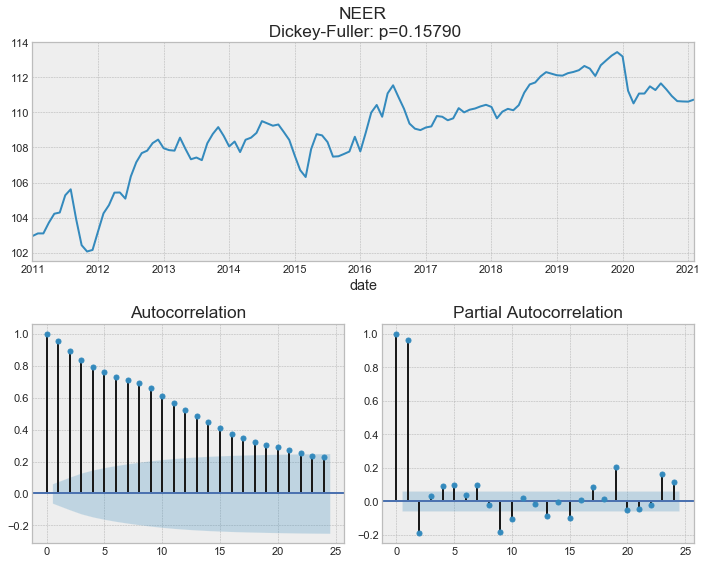

In [66]:
tsplot(data.neer, lags=24, title='NEER')

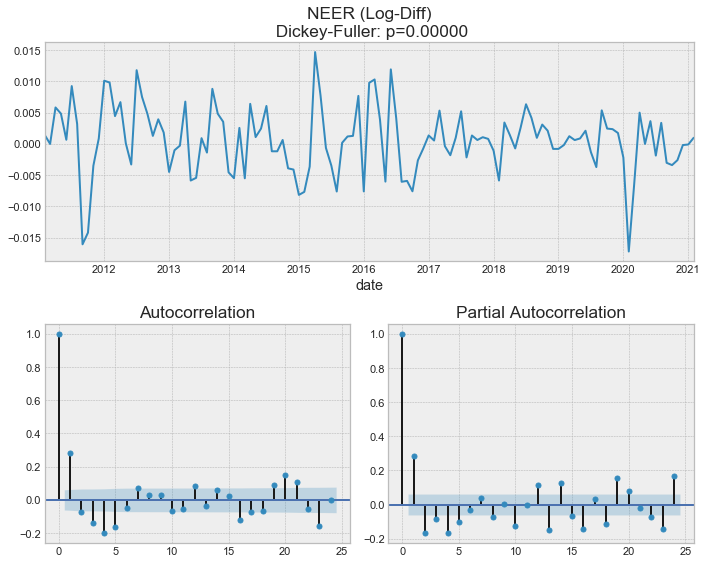

In [67]:
tsplot(np.log(data.neer+1).diff().dropna(), lags=24, title = 'NEER (Log-Diff)')

## Consumer Price Index (CPI)

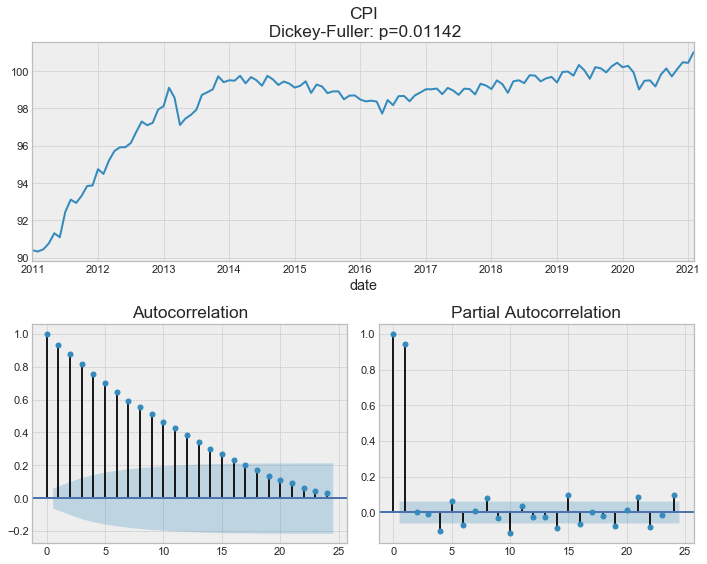

In [68]:
tsplot(data['cpi'], lags=24, title = 'CPI')

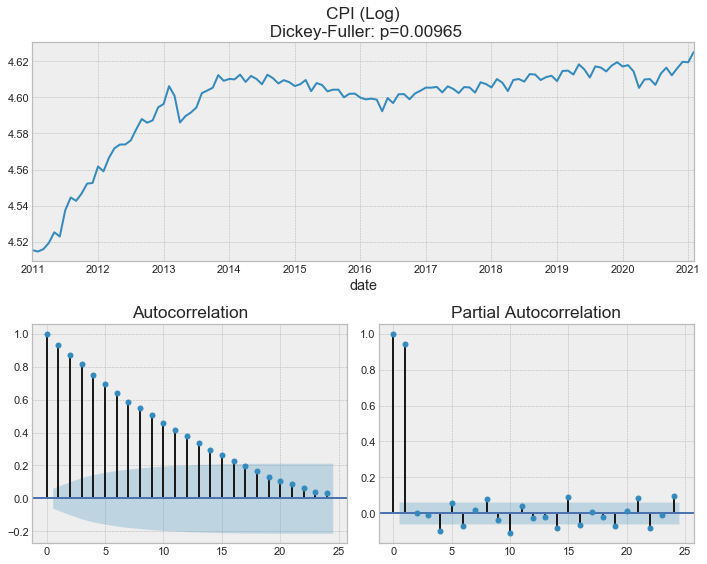

In [69]:
tsplot(np.log(data['cpi']+1), lags=24, title = 'CPI (Log)')

## Import Price Index

C:\Users\Reverse\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


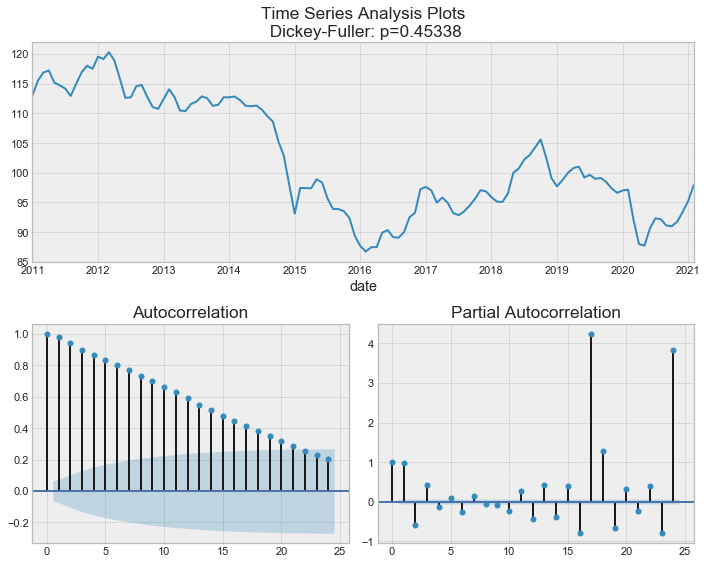

In [70]:
tsplot(data.import_price_index, lags=24)

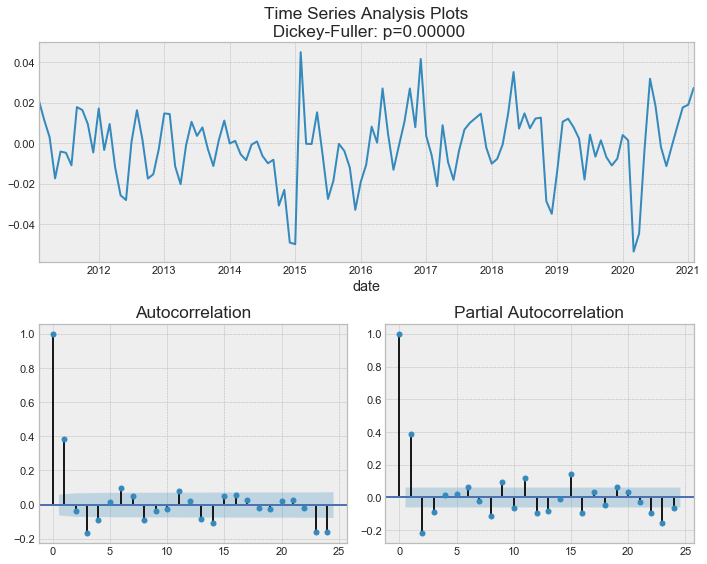

In [71]:
tsplot(np.log(data.import_price_index+1).diff().dropna(), lags=24)

# Main Model (NEER, Import Price Index, CPI)
## VAR

In [74]:
data = data.dropna(axis=1)
data.columns

Index(['neer', 'cpi', 'import_price_index', 'import_price_index_non_oil',
       'import_price_index_food', 'cpi_food', 'import_price_index_clothing',
       'cpi_clothing', 'import_price_index_footwear', 'cpi_footwear',
       'import_price_index_telecommunication_equipment',
       'cpi_telecommunication_equipment',
       'import_price_index_beverages_tobacco', 'cpi_alcohol_tobacco'],
      dtype='object')

In [75]:
data_trans = pd.concat([
                        np.log(data.neer+1).diff().dropna(), 
                        np.log(data.import_price_index+1).diff().dropna(),
                        np.log(data.cpi+1),
                       ], axis = 1)
data_trans = data_trans.iloc[1:] #since some variables use diff

In [76]:
data_trans

,neer,import_price_index,cpi
date,,,
2011-02-01,0.001442,0.021490,4.514578
2011-03-01,0.000000,0.011614,4.515880
2011-04-01,0.005842,0.002982,4.519329
2011-05-01,0.004858,-0.017355,4.525239
2011-06-01,0.000665,-0.004062,4.522908
...,...,...,...
2020-10-01,-0.003389,-0.001325,4.612255
2020-11-01,-0.002594,0.008325,4.616160
2020-12-01,-0.000179,0.017705,4.619753


In [77]:
from statsmodels.tsa.api import VAR
order = 15
model = VAR(data_trans)
model.select_order(order).summary()

,AIC,BIC,FPE,HQIC
0,-28.00,-27.92,6.943e-13,-27.97
1,-30.05,-29.75*,8.915e-14,-29.93*
2,-30.11,-29.58,8.394e-14,-29.90
3,-30.11*,-29.36,8.390e-14*,-29.81
4,-30.09,-29.11,8.586e-14,-29.69
5,-30.02,-28.81,9.257e-14,-29.53
6,-29.91,-28.48,1.034e-13,-29.33
7,-29.91,-28.25,1.047e-13,-29.23
8,-29.91,-28.02,1.056e-13,-29.14
9,-29.81,-27.70,1.176e-13,-28.95


In [78]:
orders = model.select_order(order).selected_orders
orders

{'aic': 3, 'bic': 1, 'hqic': 1, 'fpe': 3}

In [79]:
for o in list(range(1, 10)):

# for o in orders.values():
    if o == 0:
        continue
    print(f'Order: {o}')
    results = model.fit(o)
    print(results.is_stable())
    print(results.test_whiteness())
    print()


Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 157.592, critical value: 103.010>, p-value: 0.000>

Order: 2
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 97.171, critical value: 92.808>, p-value: 0.026>

Order: 3
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 64.362, critical value: 82.529>, p-value: 0.429>

Order: 4
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 49.728, critical value: 72.153>, p-value: 0.640>

Or

### Impulse Response Analysis

In [80]:
results = model.fit(3) #best BIC out of the adequate models

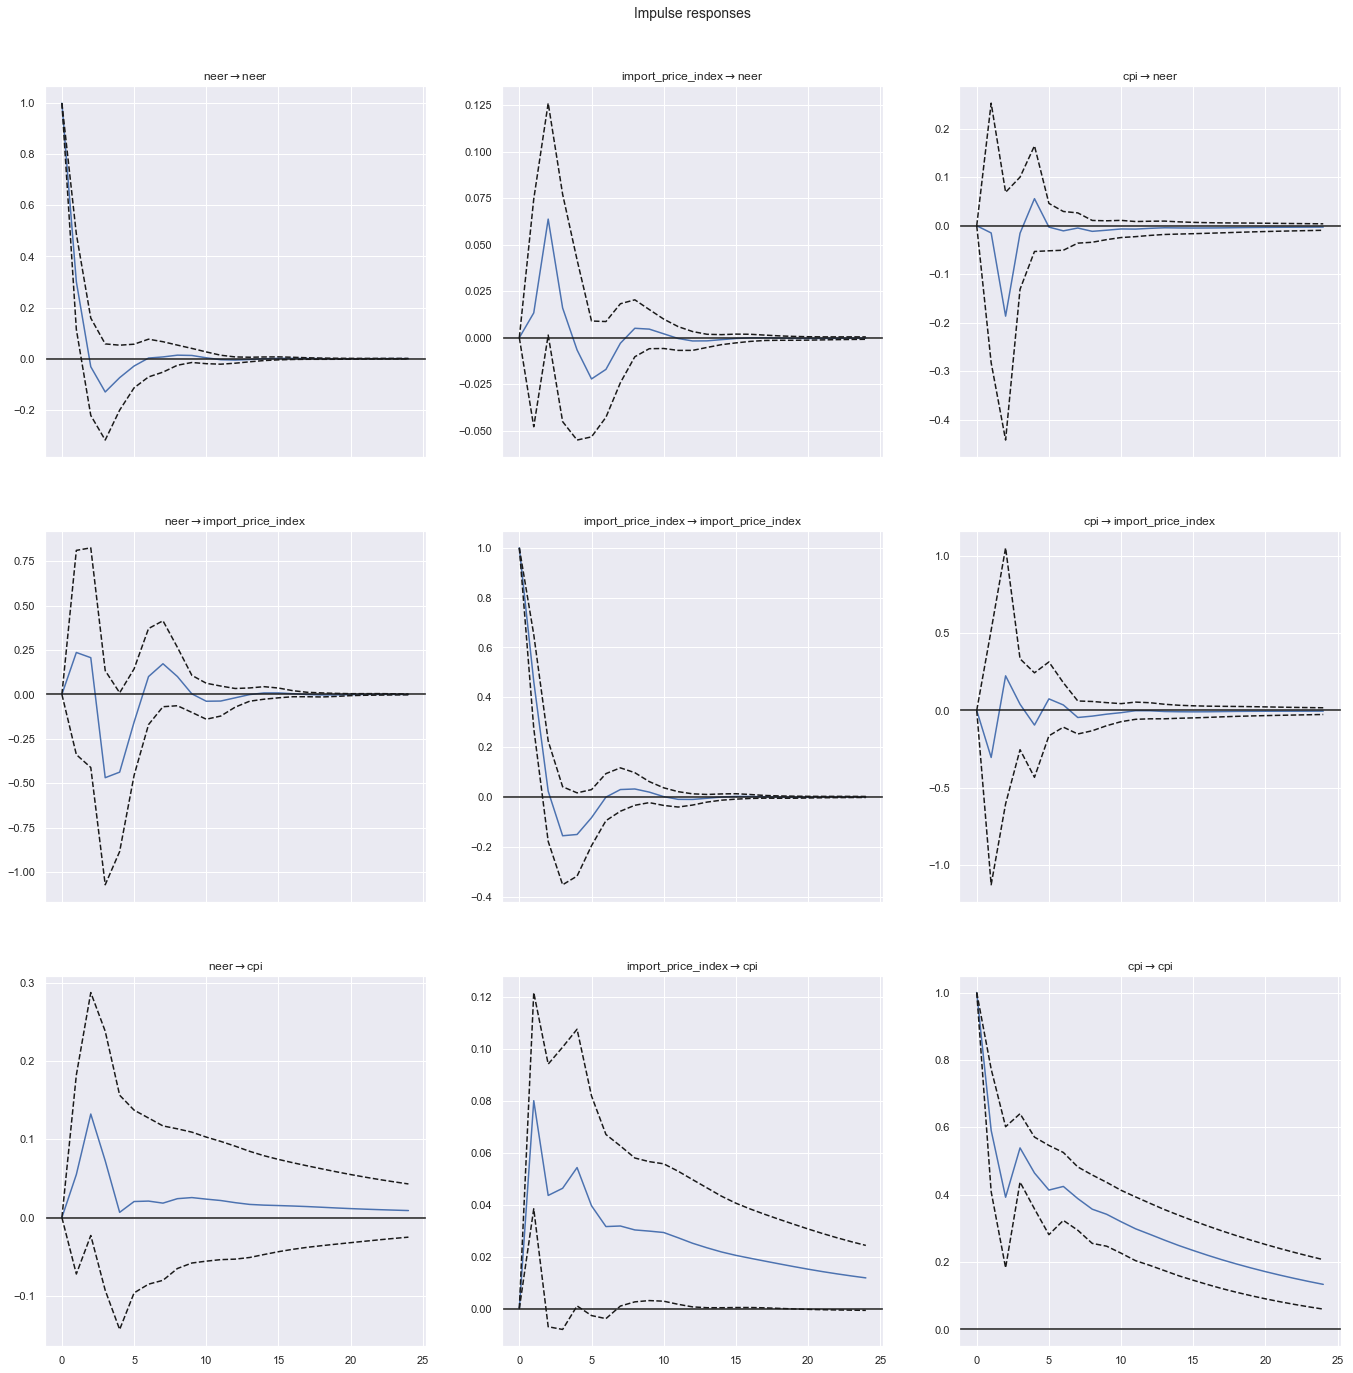

In [81]:
irf = results.irf(24)
irf_plot = irf.plot(orth=False,figsize=(20,20))

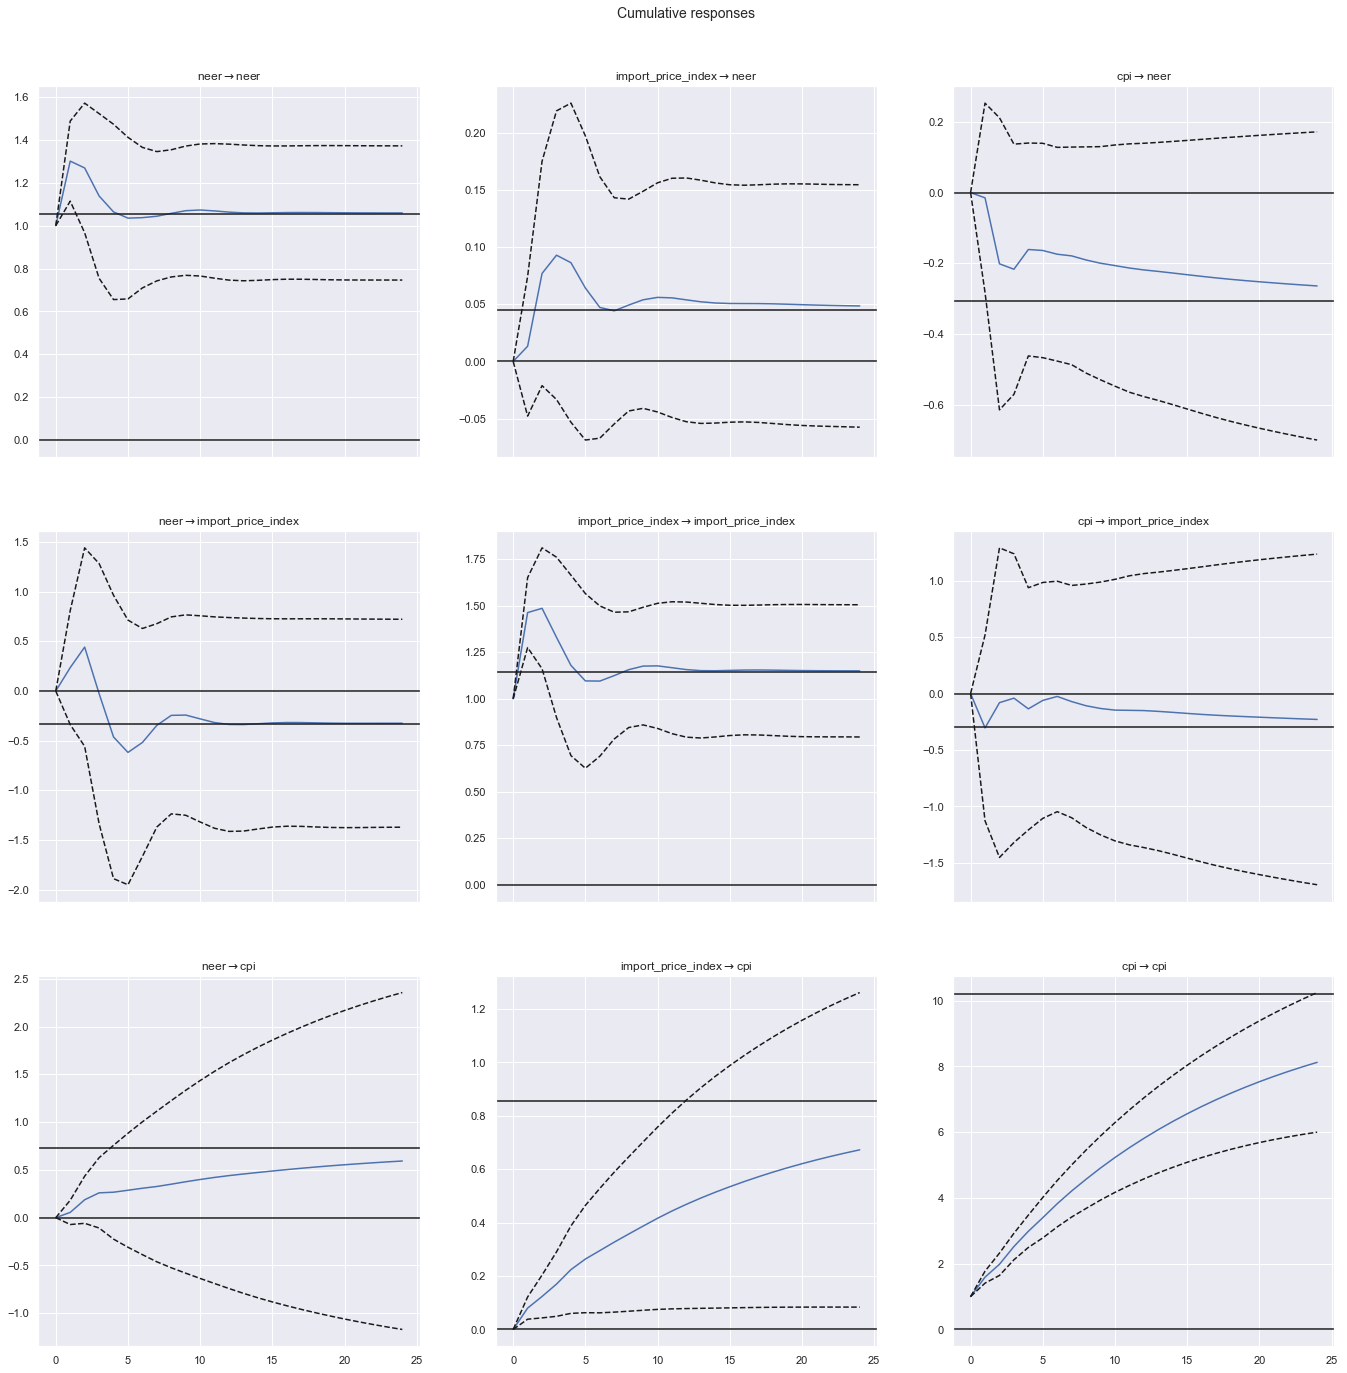

In [82]:
irf_cum_plot = irf.plot_cum_effects(orth=False,figsize=(20,20))

### Forecast Error Decomposition

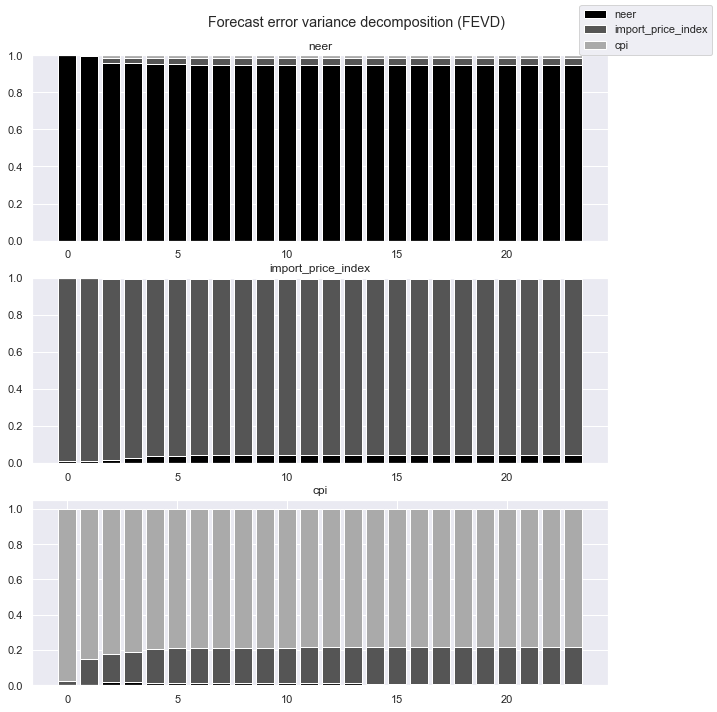

In [85]:
fevd = results.fevd(24).plot()

## Cointegration Testing/VECM
- From the cointegration test, r = 3 with Crit-95%.
- Hence, use VAR in levels.

In [86]:
from statsmodels.tsa.vector_ar.vecm import VECM, coint_johansen

def print_coint_results(coint_results):
    print ('--------------------------------------------------')
    print ('--> Trace Statistics')
    print ('variable statistic Crit-90% Crit-95%  Crit-99%')
    for i in range(len(coint_results.lr1)):
        print ('r =', i, '\t', round(coint_results.lr1[i], 4), coint_results.cvt[i, 0], coint_results.cvt[i, 1], coint_results.cvt[i, 2])
    print ('--------------------------------------------------')

cols = ['neer', 'import_price_index','cpi']
coint_results = coint_johansen(data[cols], det_order=0, k_ar_diff=1)
print_coint_results(coint_results)

--------------------------------------------------
--> Trace Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 38.0548 27.0669 29.7961 35.4628
r = 1 	 16.5818 13.4294 15.4943 19.9349
r = 2 	 6.361 2.7055 3.8415 6.6349
--------------------------------------------------


### VAR in Levels

In [142]:
data_levels = pd.concat([
    data.neer,
    data.import_price_index,
    data.cpi
                       ], axis = 1)


In [88]:
from statsmodels.tsa.api import VAR
order = 15
model_levels = VAR(data_levels)
model_levels.select_order(order).summary()

C:\Users\Reverse\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,4.679,4.754,107.7,4.709
1,-2.152,-1.852*,0.1163,-2.030
2,-2.351,-1.826,0.09537,-2.138*
3,-2.426*,-1.676,0.08857*,-2.122
4,-2.416,-1.441,0.08964,-2.021
5,-2.361,-1.162,0.09496,-1.875
6,-2.307,-0.8833,0.1007,-1.730
7,-2.303,-0.6545,0.1017,-1.635
8,-2.245,-0.3715,0.1088,-1.485
9,-2.230,-0.1316,0.1116,-1.379


In [89]:
orders = model_levels.select_order(order).selected_orders
orders

{'aic': 3, 'bic': 1, 'hqic': 2, 'fpe': 3}

In [90]:
for o in list(range(1, 10)):
# for o in orders.values():
    if o == 0:
        continue
    print(f'Order: {o}')
    results = model_levels.fit(o)
    print(results.is_stable())
    print(results.test_whiteness())
    print()


Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 176.601, critical value: 103.010>, p-value: 0.000>

Order: 2
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 123.219, critical value: 92.808>, p-value: 0.000>

Order: 3
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 71.617, critical value: 82.529>, p-value: 0.214>

Order: 4
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 61.529, critical value: 72.153>, p-value: 0.225>

O

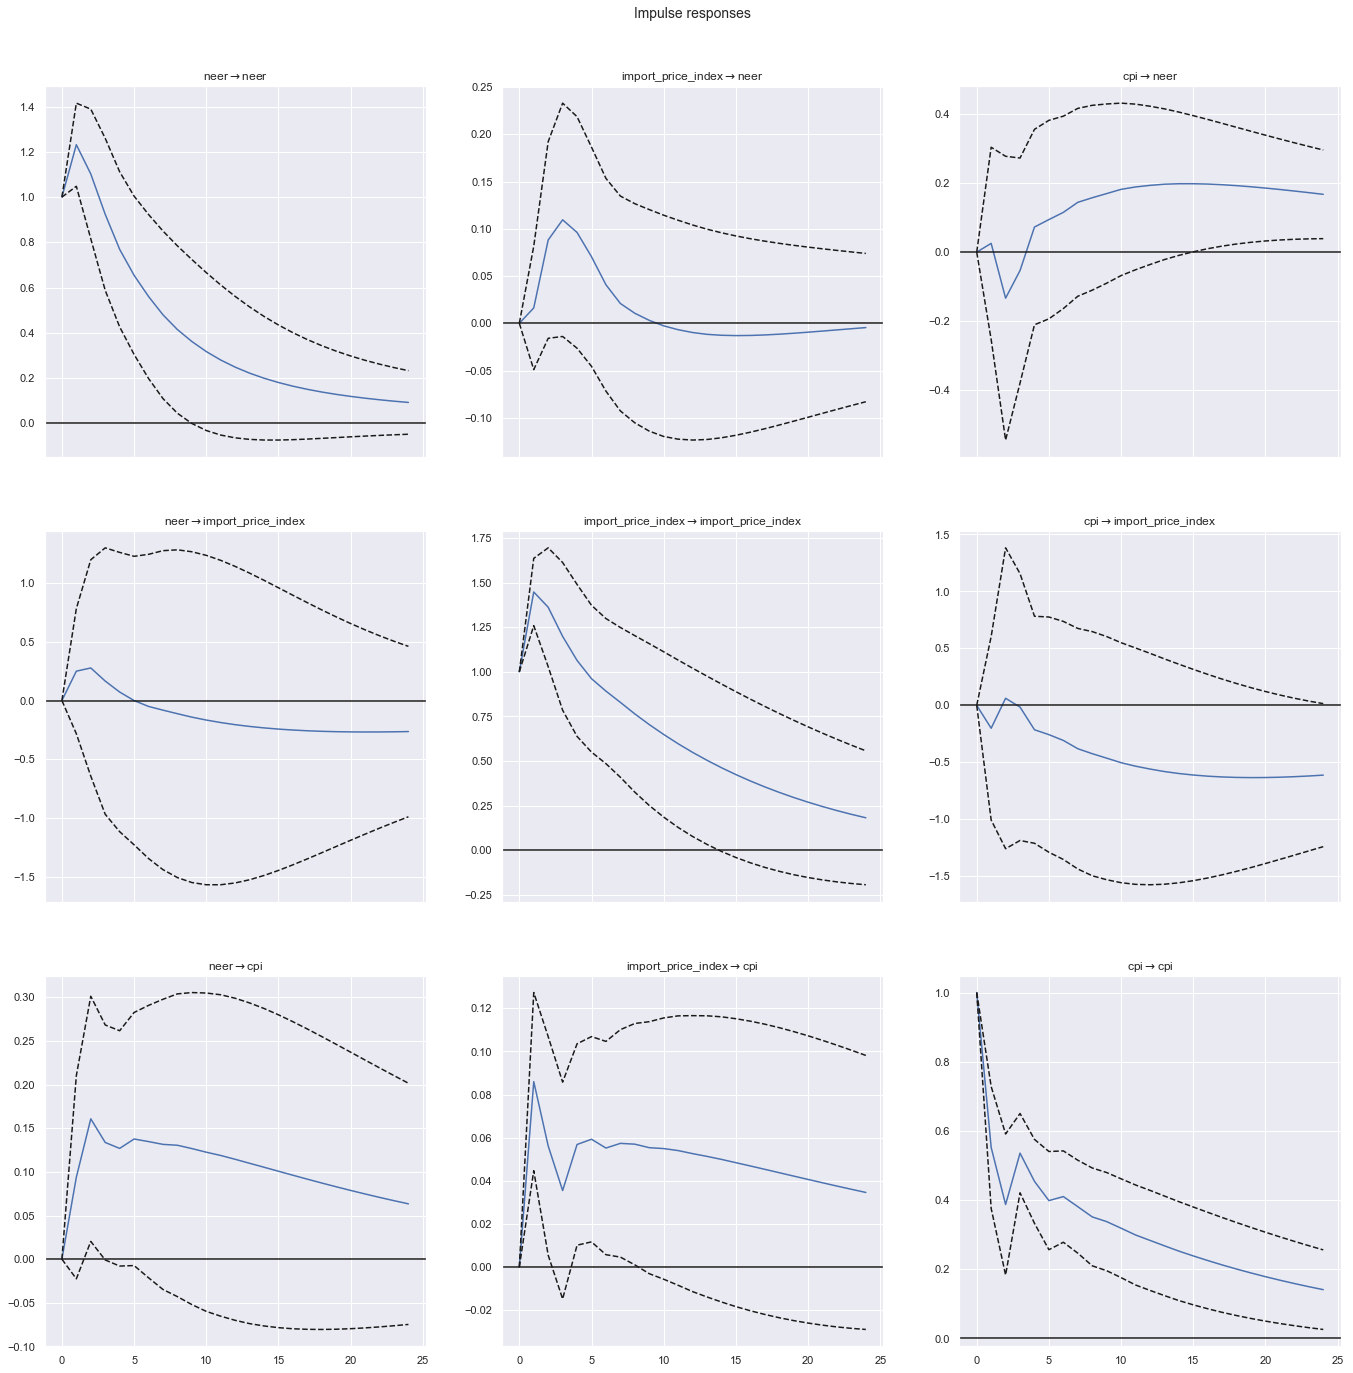

In [91]:
results_levels= model_levels.fit(3) #best BIC out of the adequate models
irf_levels = results_levels.irf(24)
irf_plot_levels = irf_levels.plot(orth=False,figsize=(20,20))

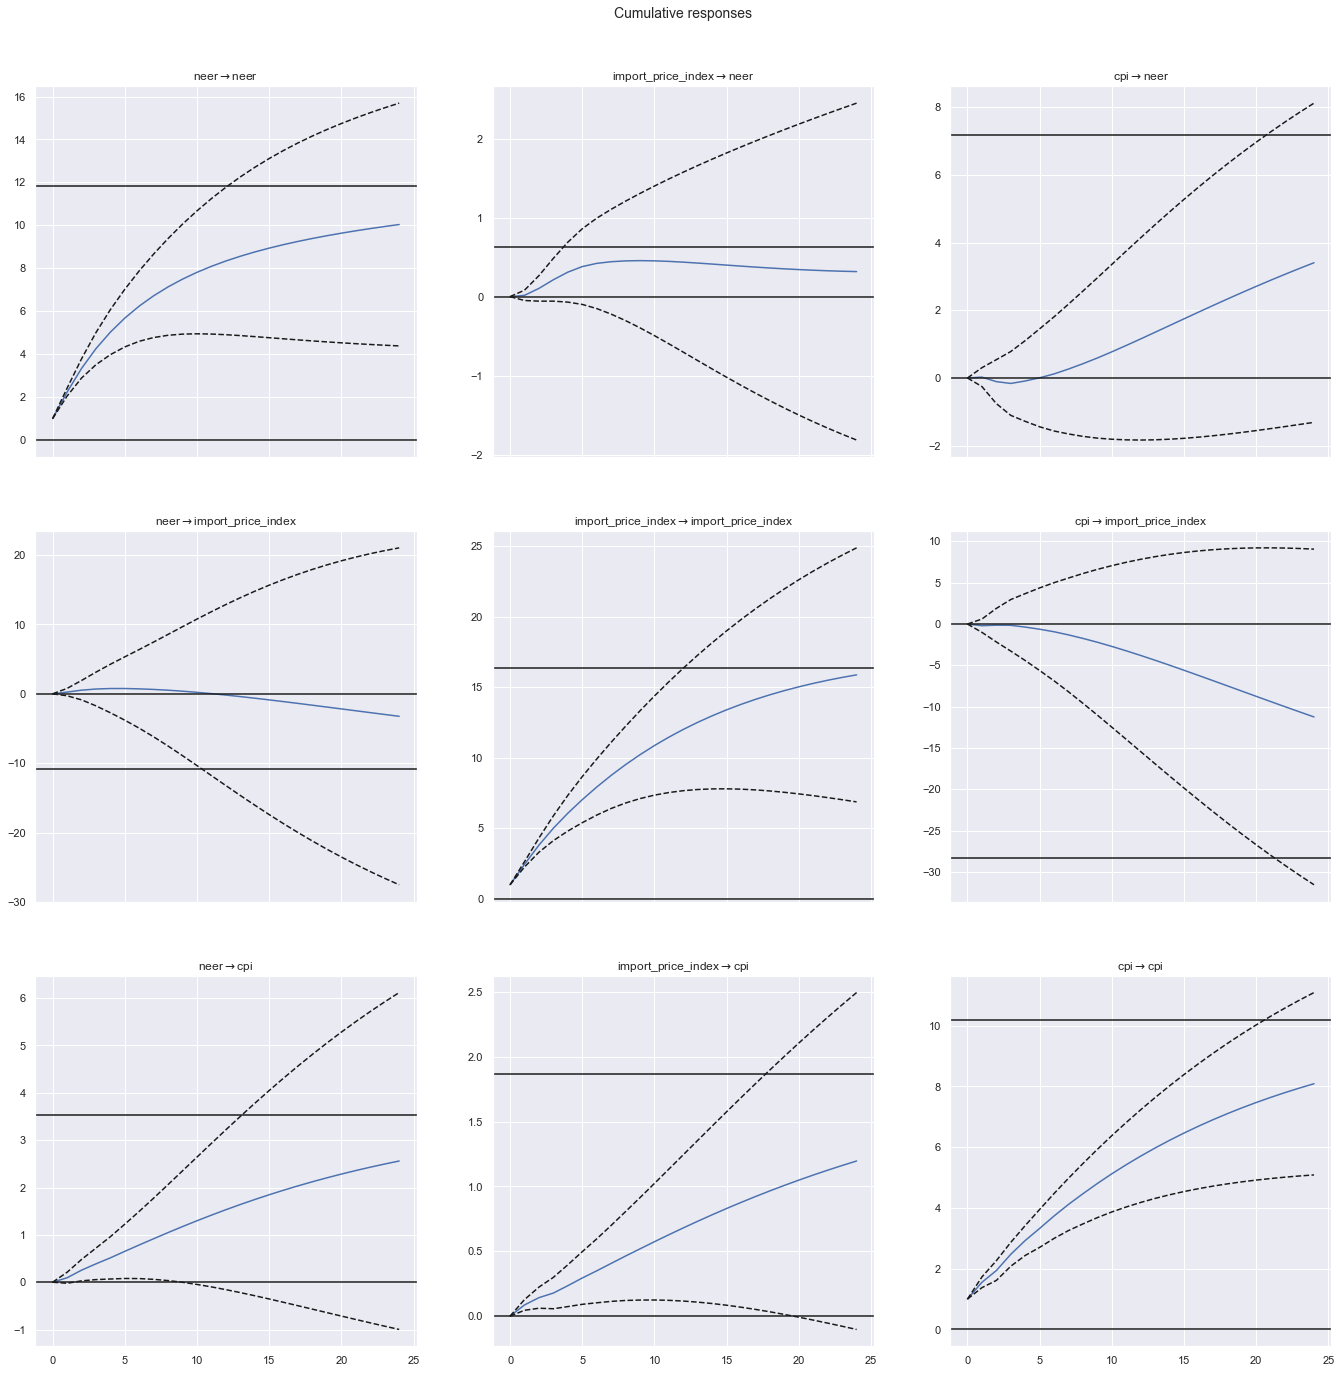

In [92]:
irf_cum_plot_levels = irf_levels.plot_cum_effects(orth=False,figsize=(20,20))

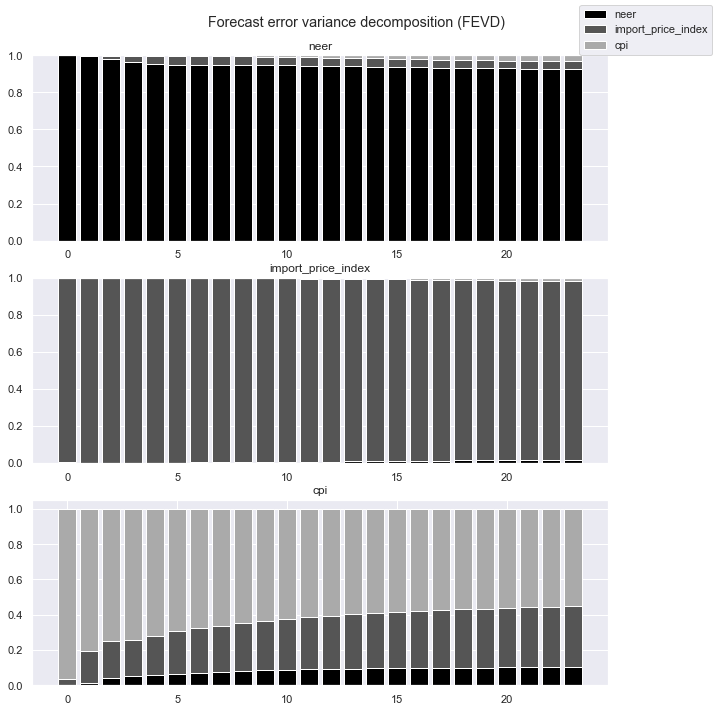

In [95]:
fevd = results_levels.fevd(24).plot()

# Heterogeneity Analysis

## Time Series Analysis



### IPI Footwear

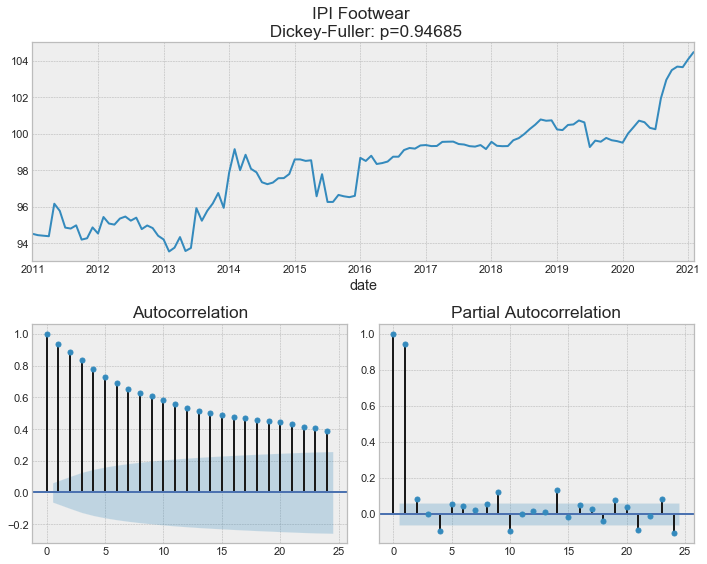

In [110]:
tsplot(data.import_price_index_footwear, lags = 24, title='IPI Footwear ')

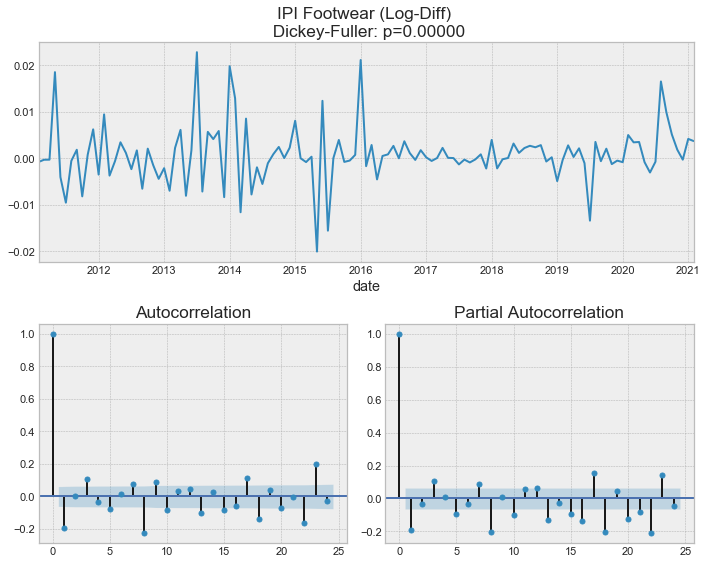

In [111]:
tsplot(np.log(data.import_price_index_footwear+1).diff().dropna(), lags = 24, title='IPI Footwear (Log-Diff) ')

### CPI Footwear

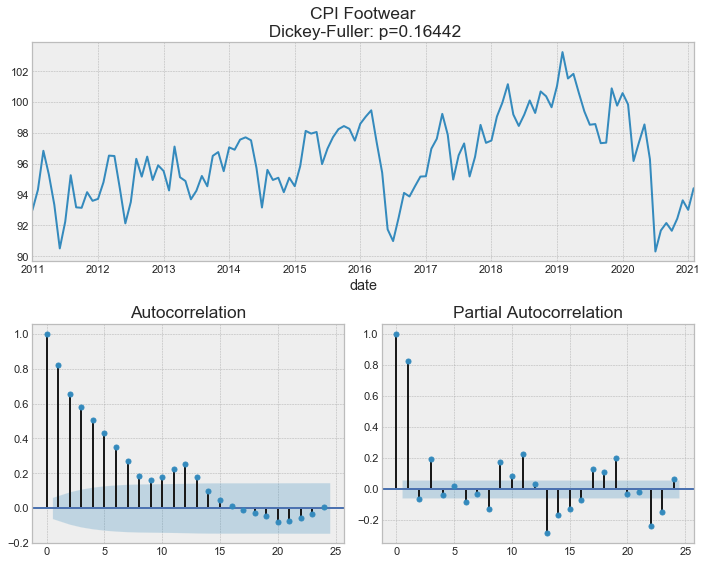

In [112]:
tsplot(data.cpi_footwear, lags = 24, title='CPI Footwear')

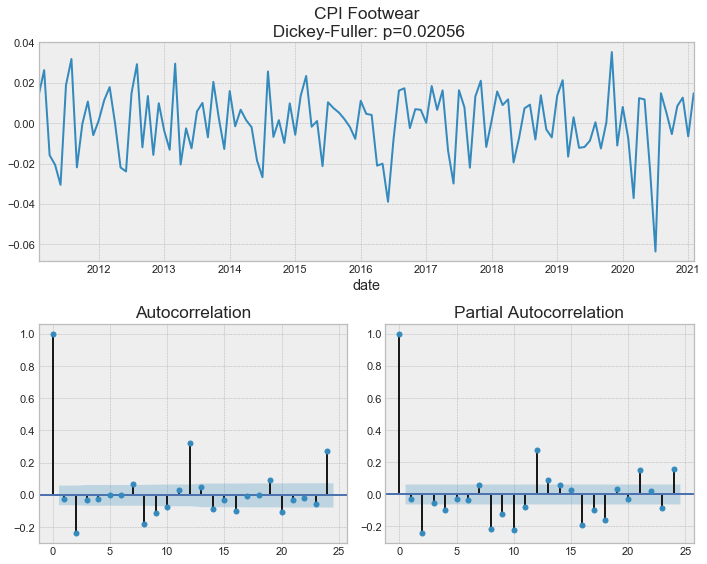

In [113]:
tsplot(np.log(data.cpi_footwear+1).diff().dropna(), lags = 24, title='CPI Footwear')

### Import Price Index Telecommunication Equipment

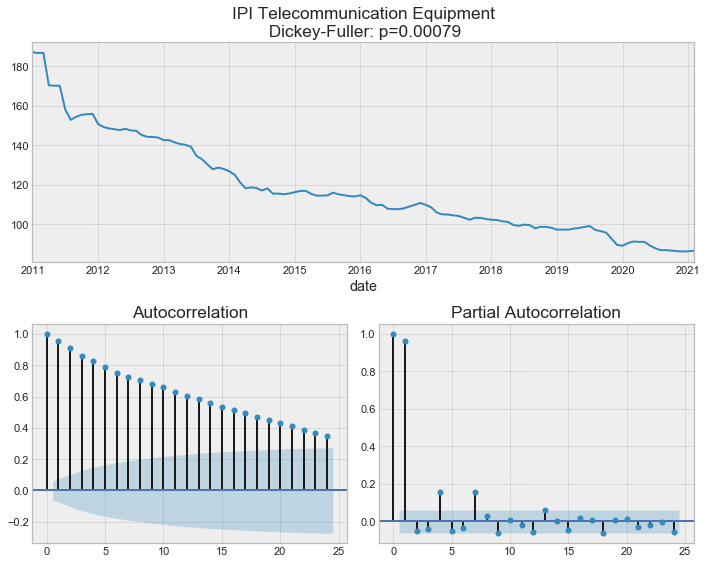

In [115]:
tsplot(data['import_price_index_telecommunication_equipment'], lags = 24, title='IPI Telecommunication Equipment')

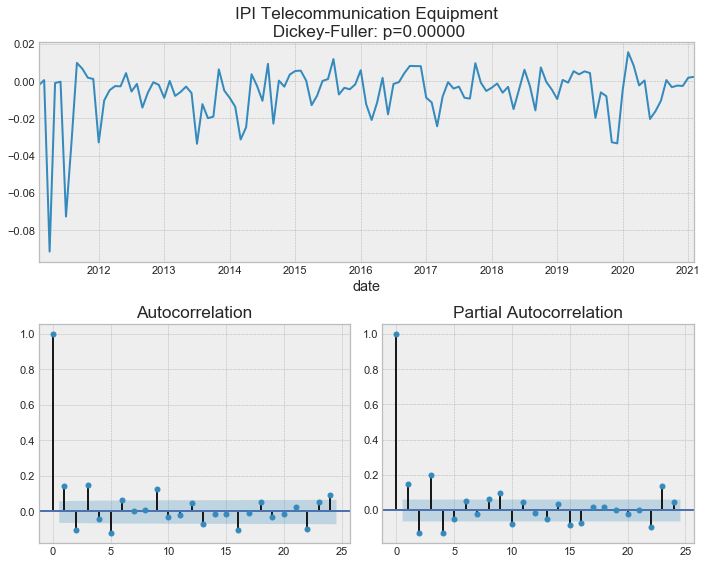

In [116]:
tsplot(np.log(data['import_price_index_telecommunication_equipment']+1).diff().dropna(), lags = 24, title='IPI Telecommunication Equipment')

### CPI Telecommunication Equipment

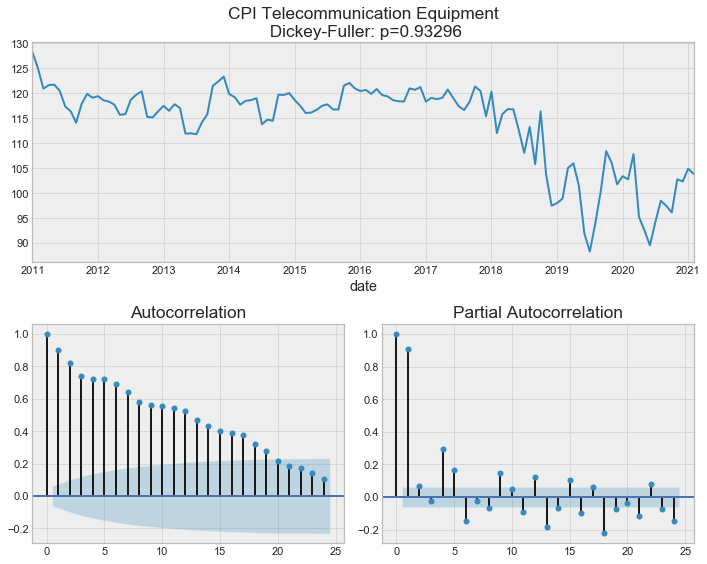

In [117]:
tsplot(data['cpi_telecommunication_equipment'], lags = 24, title='CPI Telecommunication Equipment')

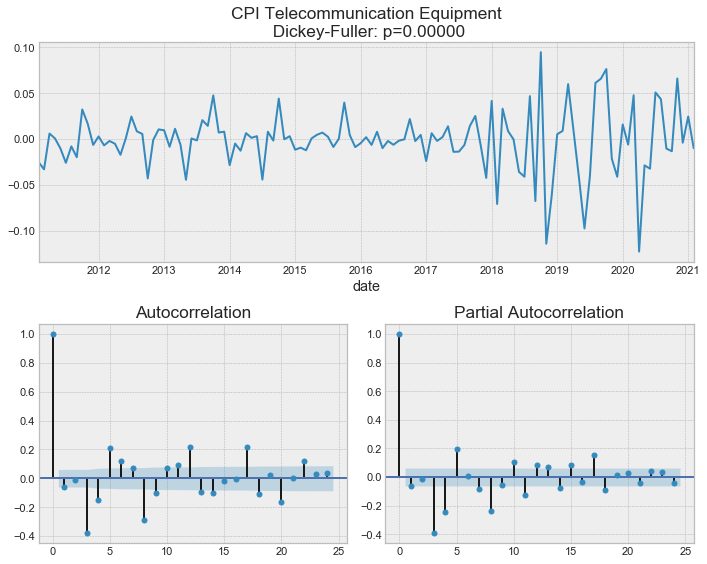

In [118]:
tsplot(np.log(data['cpi_telecommunication_equipment']+1).diff().dropna(), lags = 24, title='CPI Telecommunication Equipment')

### Import Price Index Beverages & Tobacco

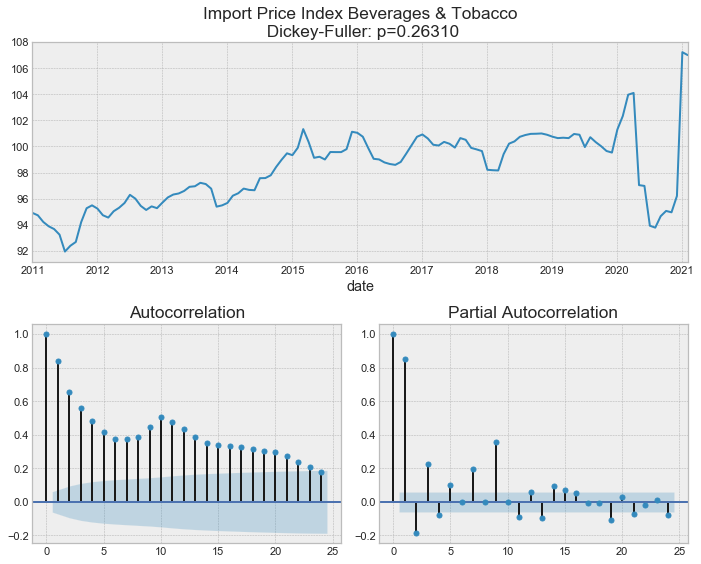

In [119]:
tsplot(data['import_price_index_beverages_tobacco'], lags = 24, title='Import Price Index Beverages & Tobacco')

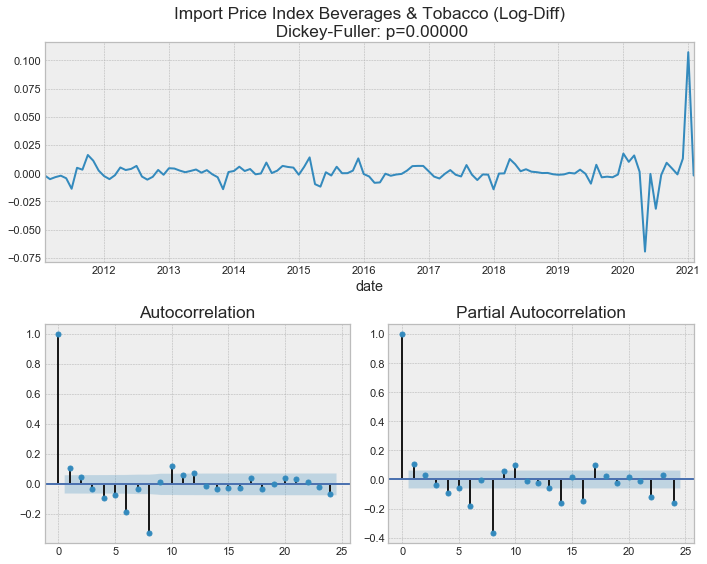

In [120]:
tsplot(np.log(data['import_price_index_beverages_tobacco']+1).diff().dropna(), lags = 24, title='Import Price Index Beverages & Tobacco (Log-Diff)')

### CPI Alcohol Tobacco

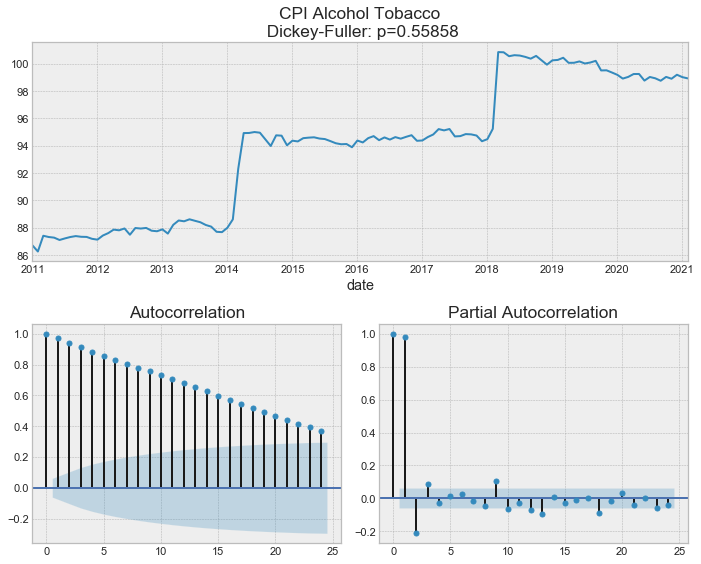

In [121]:
tsplot(data['cpi_alcohol_tobacco'], lags = 24, title='CPI Alcohol Tobacco')

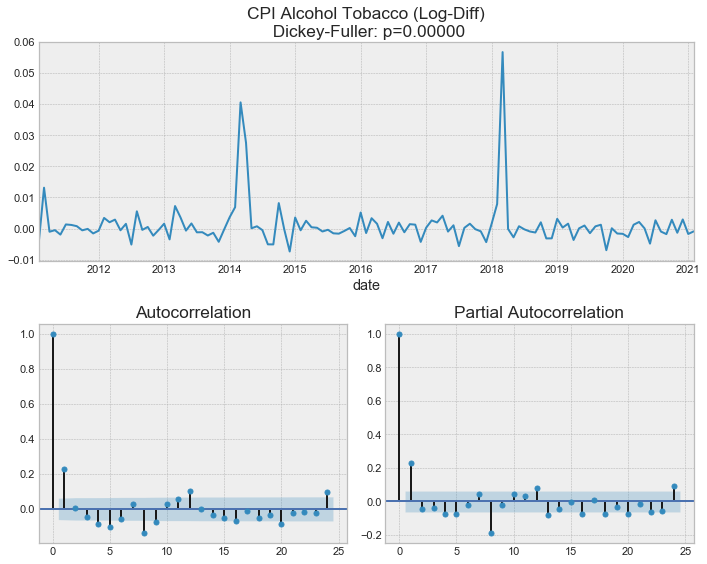

In [122]:
tsplot(np.log(data['cpi_alcohol_tobacco']+1).diff().dropna(), lags = 24, title='CPI Alcohol Tobacco (Log-Diff)')

Transformations: 

- import_price_index_footwear: log-diff
- cpi_footwear: log-diff


- import_price_index_telecommunication_equipment: log-diff
- cpi_telecommunication_equipment: log-diff


- import_price_index_beverages_tobacco: log-diff
- cpi_alcohol_tobacco: log-diff

## VAR Model

In [123]:
data_trans = pd.concat([
    np.log(data.neer+1).diff().dropna(),
    np.log(data.import_price_index_footwear+1).diff().dropna(),
    np.log(data.cpi_footwear+1).diff().dropna(),
    np.log(data.import_price_index_telecommunication_equipment+1).diff().dropna(),
    np.log(data.cpi_telecommunication_equipment+1).diff().dropna(),
    np.log(data.import_price_index_beverages_tobacco+1).diff().dropna(),
    np.log(data.cpi_alcohol_tobacco+1).diff().dropna(),

], axis = 1) 

In [124]:
data_trans

,neer,import_price_index_footwear,cpi_footwear,import_price_index_telecommunication_equipment,cpi_telecommunication_equipment,import_price_index_beverages_tobacco,cpi_alcohol_tobacco
date,,,,,,,
2011-02-01,0.001442,-0.000786,0.013863,-0.002274,-0.025123,-0.001931,-0.005109
2011-03-01,0.000000,-0.000314,0.026243,0.000533,-0.033092,-0.005310,0.013114
2011-04-01,0.005842,-0.000294,-0.015835,-0.091431,0.005945,-0.003503,-0.001030
2011-05-01,0.004858,0.018520,-0.020607,-0.001022,0.000636,-0.002237,-0.000521
2011-06-01,0.000665,-0.004032,-0.030536,-0.000327,-0.010263,-0.004520,-0.001950
...,...,...,...,...,...,...,...
2020-10-01,-0.003389,0.005133,-0.005426,-0.003266,-0.013347,0.004193,0.002823
2020-11-01,-0.002594,0.001845,0.008459,-0.002396,0.065976,-0.001094,-0.001350
2020-12-01,-0.000179,-0.000296,0.012657,-0.002608,-0.004056,0.012942,0.002919


In [125]:
from statsmodels.tsa.api import VAR
order = 10
model = VAR(data_trans)
model.select_order(order).summary()

C:\Users\Reverse\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,-63.67,-63.50*,2.238e-28*,-63.60*
1,-63.51,-62.15,2.610e-28,-62.96
2,-63.30,-60.73,3.279e-28,-62.26
3,-63.11,-59.35,4.040e-28,-61.59
4,-62.97,-58.01,4.909e-28,-60.96
5,-62.87,-56.72,5.904e-28,-60.37
6,-62.82,-55.47,7.024e-28,-59.84
7,-62.76,-54.21,9.056e-28,-59.29
8,-63.35,-53.61,6.543e-28,-59.40
9,-63.69*,-52.75,6.793e-28,-59.25


In [126]:
orders = model.select_order(order).selected_orders
for o in list(range(1, 10)):
# for o in orders.values():
    if o == 0:
        continue
    print(f'Order: {o}')
    results = model.fit(o)
    print(results.is_stable())
    print(results.test_whiteness())
    print()


Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 472.818, critical value: 490.960>, p-value: 0.143>

Order: 2
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 401.535, critical value: 439.165>, p-value: 0.359>

Order: 3
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 345.986, critical value: 387.188>, p-value: 0.445>

Order: 4
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 321.213, critical value: 334.990

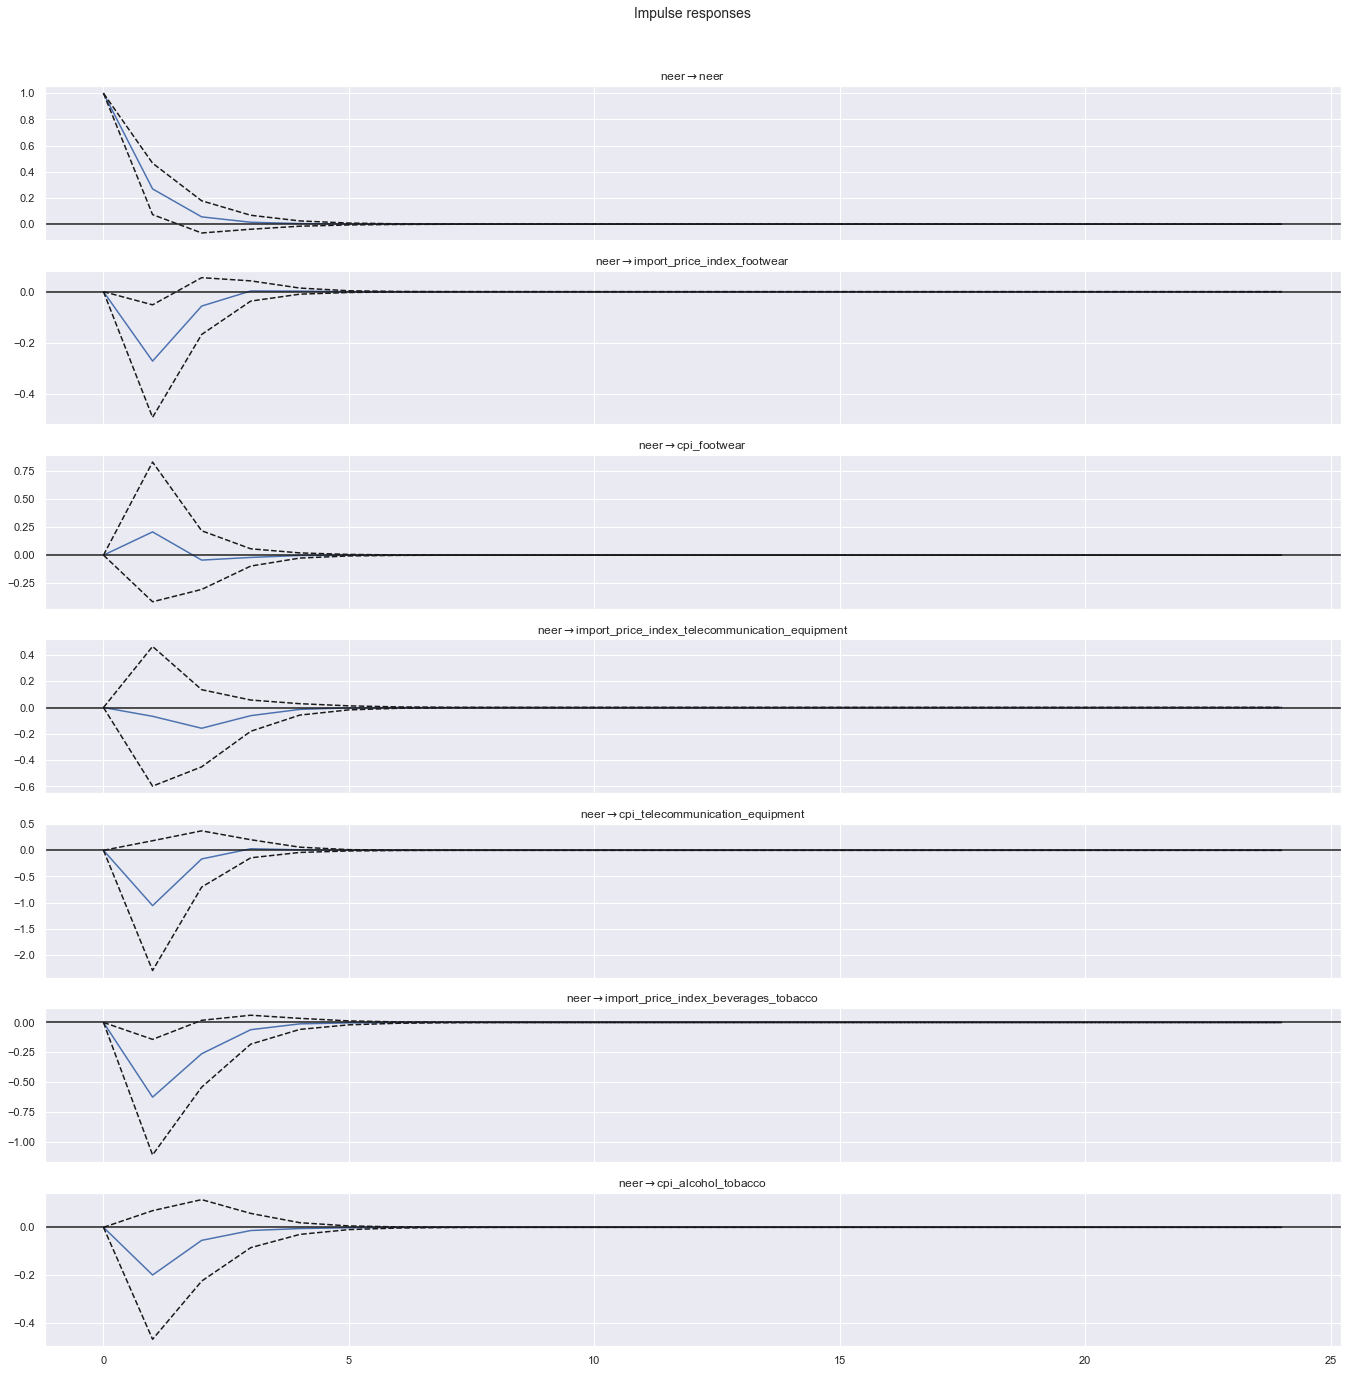

In [127]:
results = model.fit(1) #1 best BIC out of adequate models
irf = results.irf(24)
irf_plot = irf.plot(orth=False,figsize=(20,20), impulse='neer')
plt.savefig('var_hetero_ira.png')

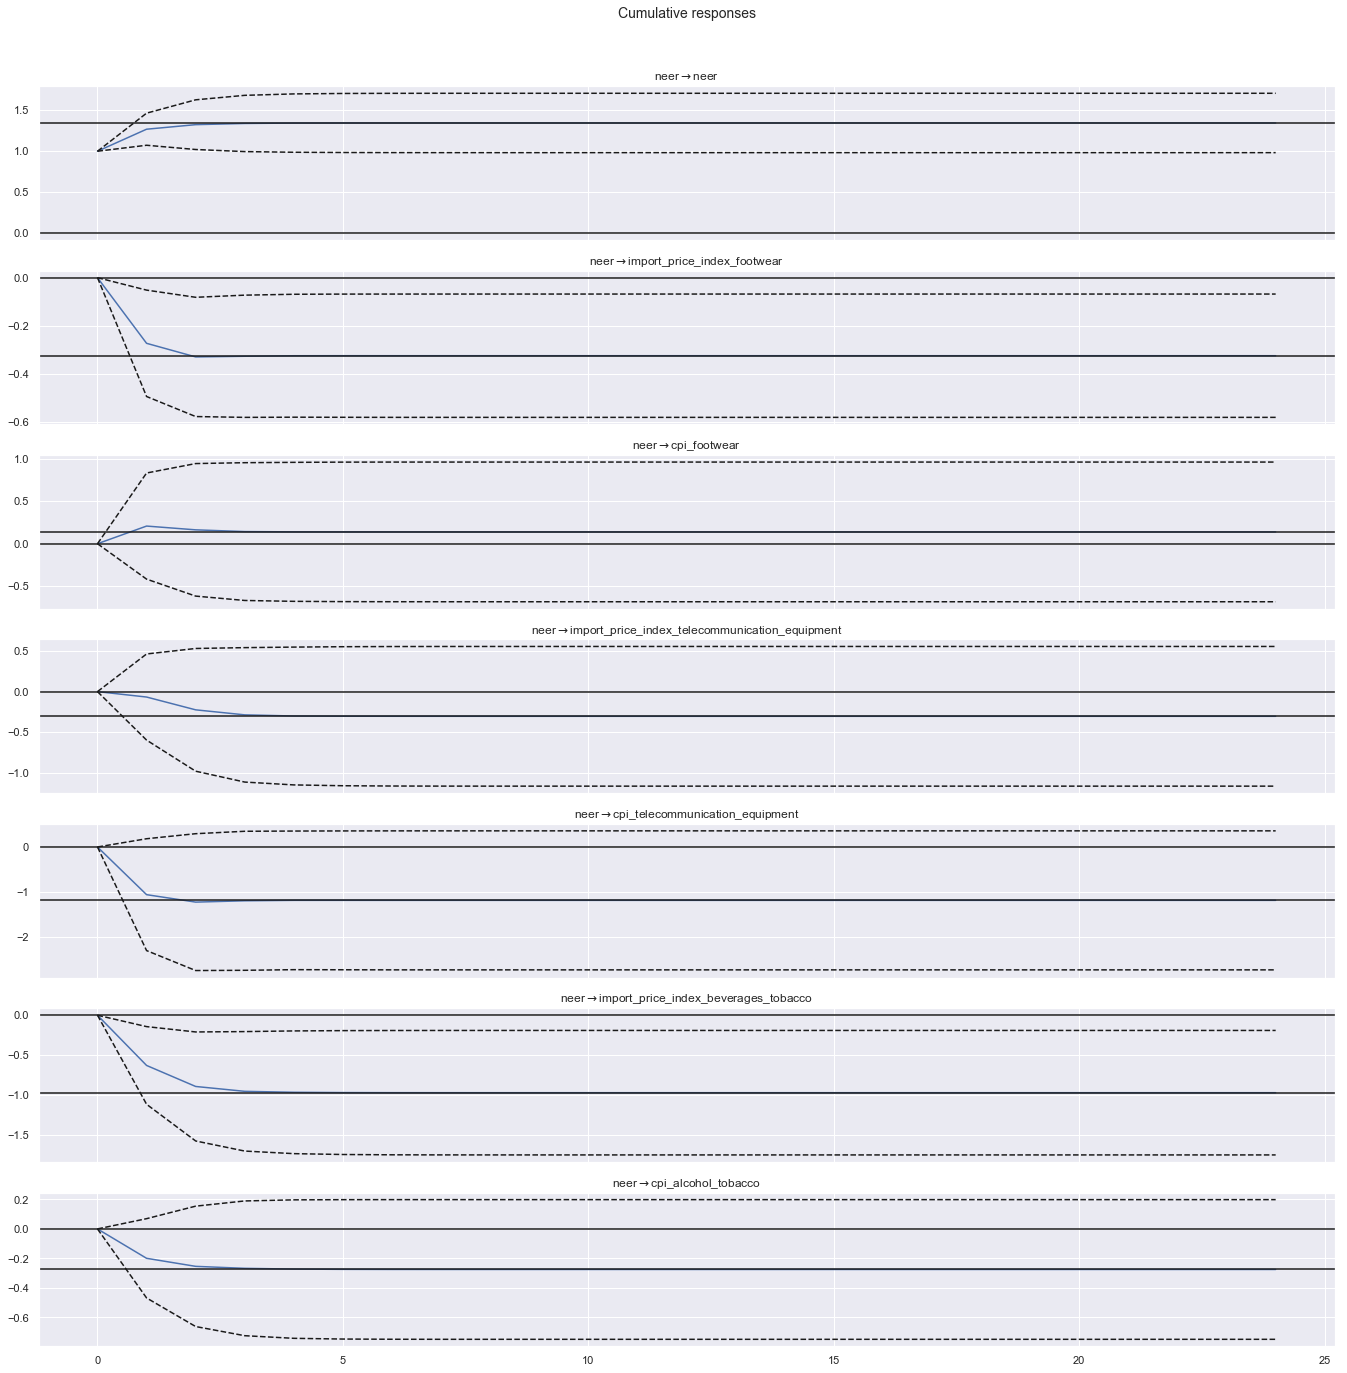

In [128]:
irf_cum_plot = irf.plot_cum_effects(orth=False,figsize=(20,20), impulse='neer')
plt.savefig('var_hetero_ira_cum.png')

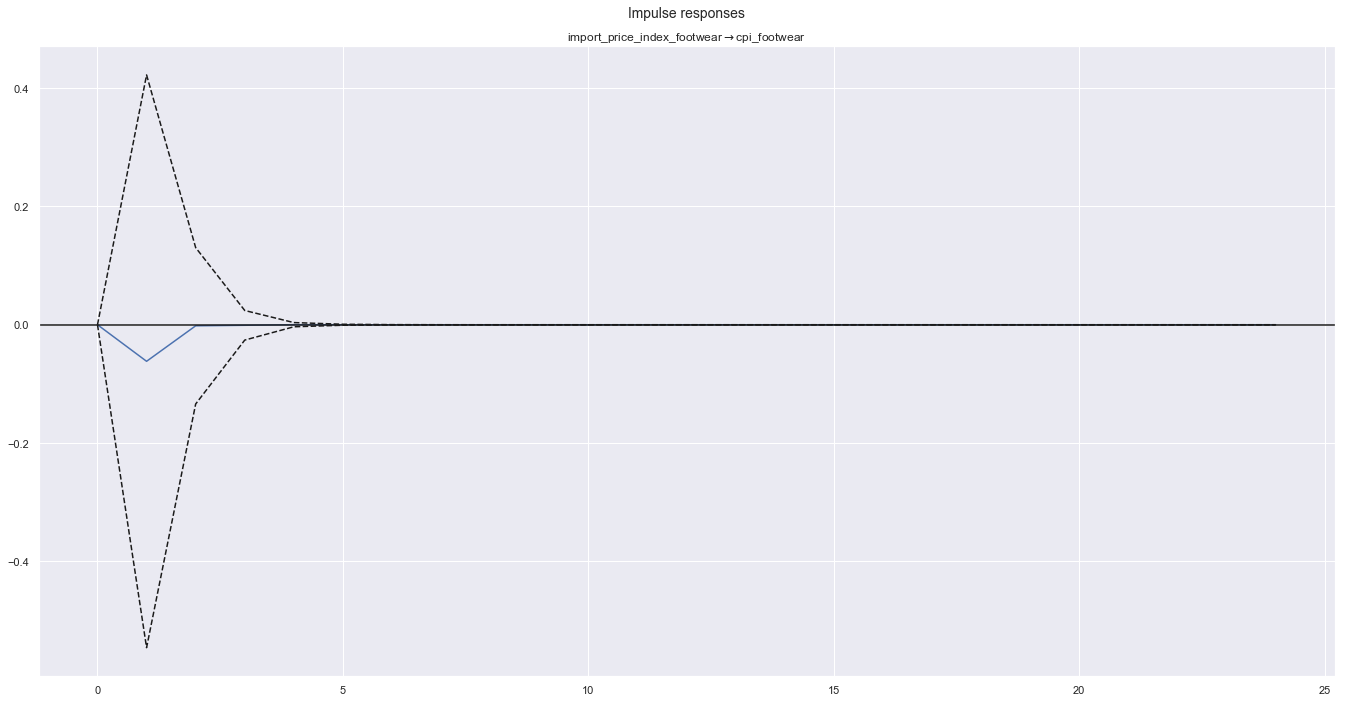

In [129]:
irf_plot = irf.plot(orth=False, figsize=(20,10), impulse='import_price_index_footwear', response='cpi_footwear')
plt.savefig('ipi_cpi_footwear.png')

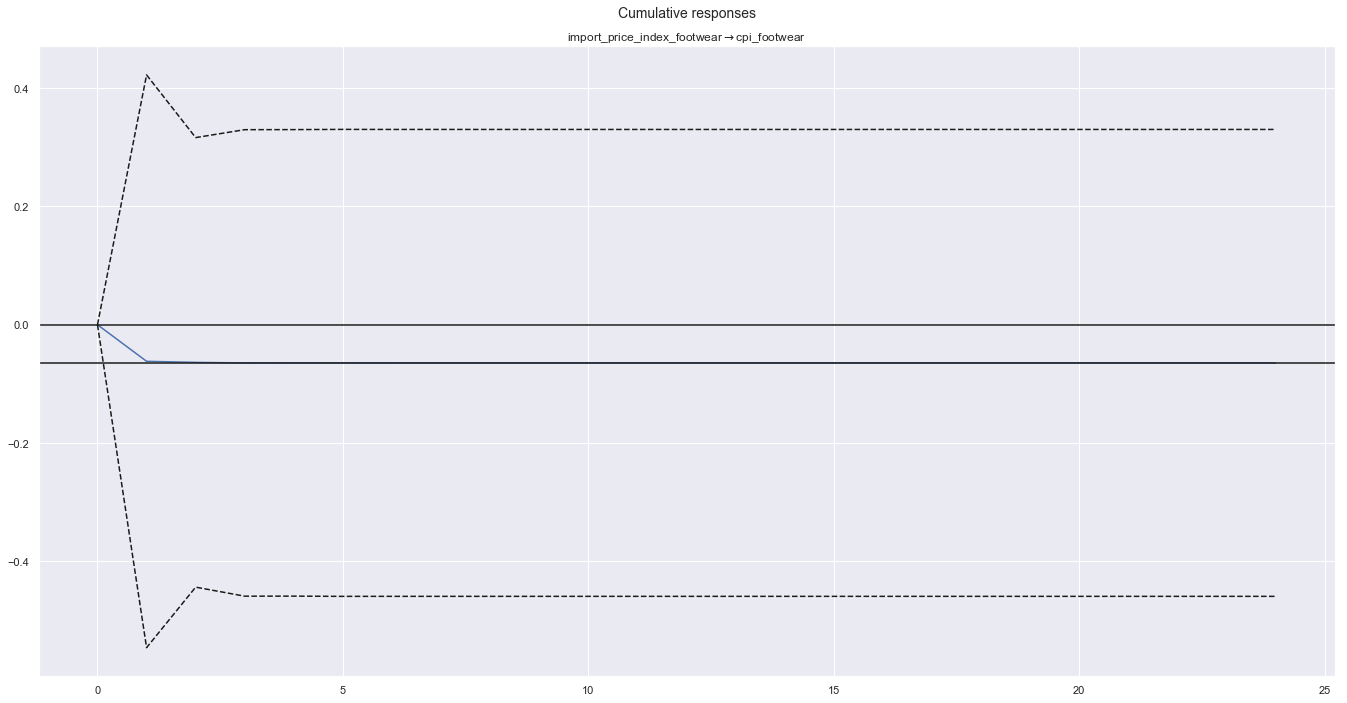

In [130]:
irf_plot = irf.plot_cum_effects(orth=False, figsize=(20,10), impulse='import_price_index_footwear', response='cpi_footwear')
plt.savefig('ipi_cpi_cum_footwear.png')

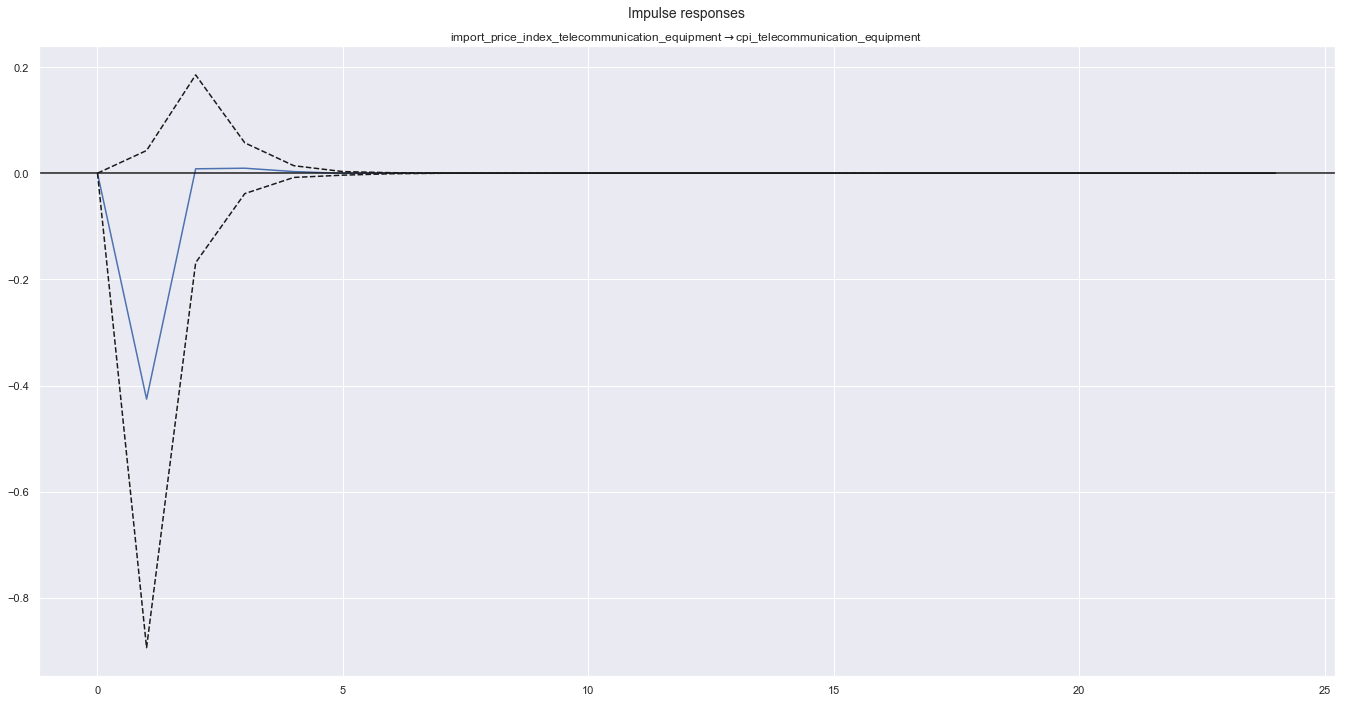

In [131]:
irf_plot = irf.plot(orth=False, figsize=(20,10), impulse='import_price_index_telecommunication_equipment',
                    response='cpi_telecommunication_equipment')
plt.savefig('ipi_cpi_telecomm.png')

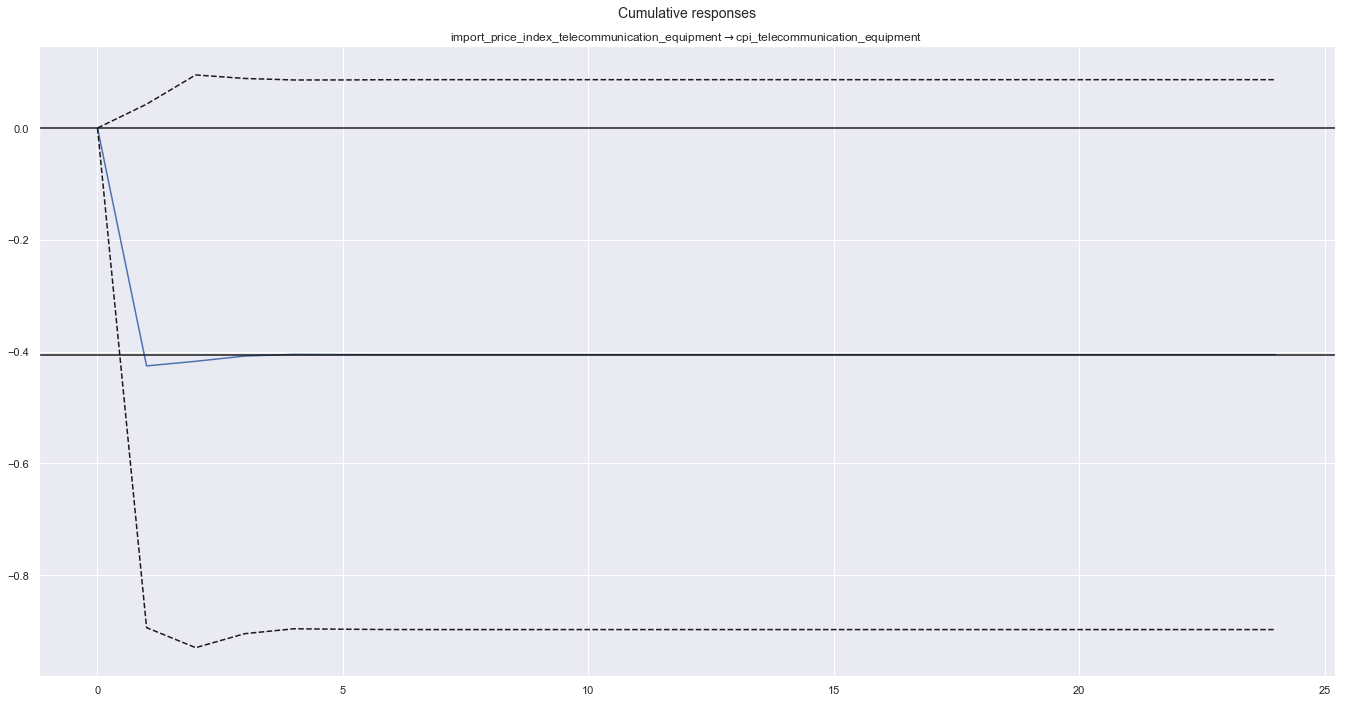

In [132]:
irf_plot = irf.plot_cum_effects(orth=False, figsize=(20,10), impulse='import_price_index_telecommunication_equipment', response='cpi_telecommunication_equipment')
plt.savefig('ipi_cpi_cum_telecomm.png')

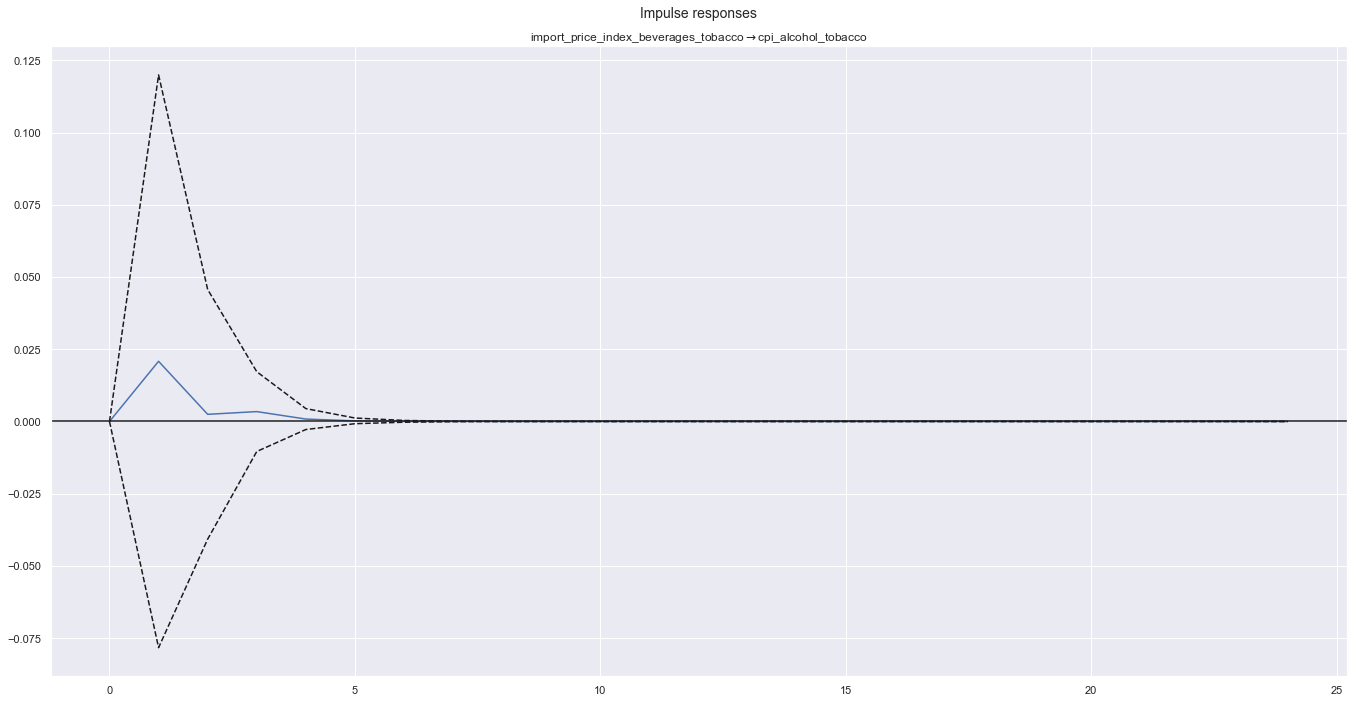

In [133]:
irf_plot = irf.plot(orth=False, figsize=(20,10), impulse='import_price_index_beverages_tobacco', response='cpi_alcohol_tobacco')
plt.savefig('ipi_cpi_beverages_tobacco.png')

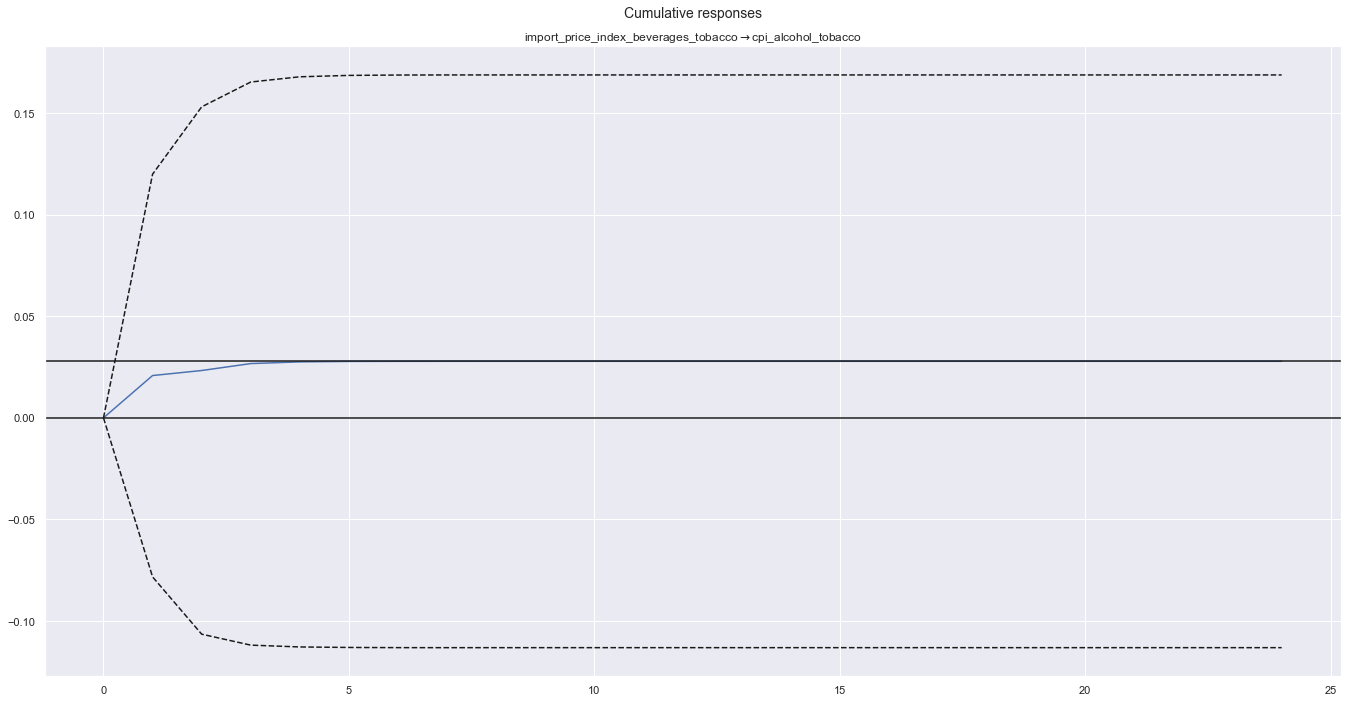

In [134]:
irf_plot = irf.plot_cum_effects(orth=False, figsize=(20,10), impulse='import_price_index_beverages_tobacco', response='cpi_alcohol_tobacco')
plt.savefig('ipi_cpi_cum_beverages_tobacco.png')

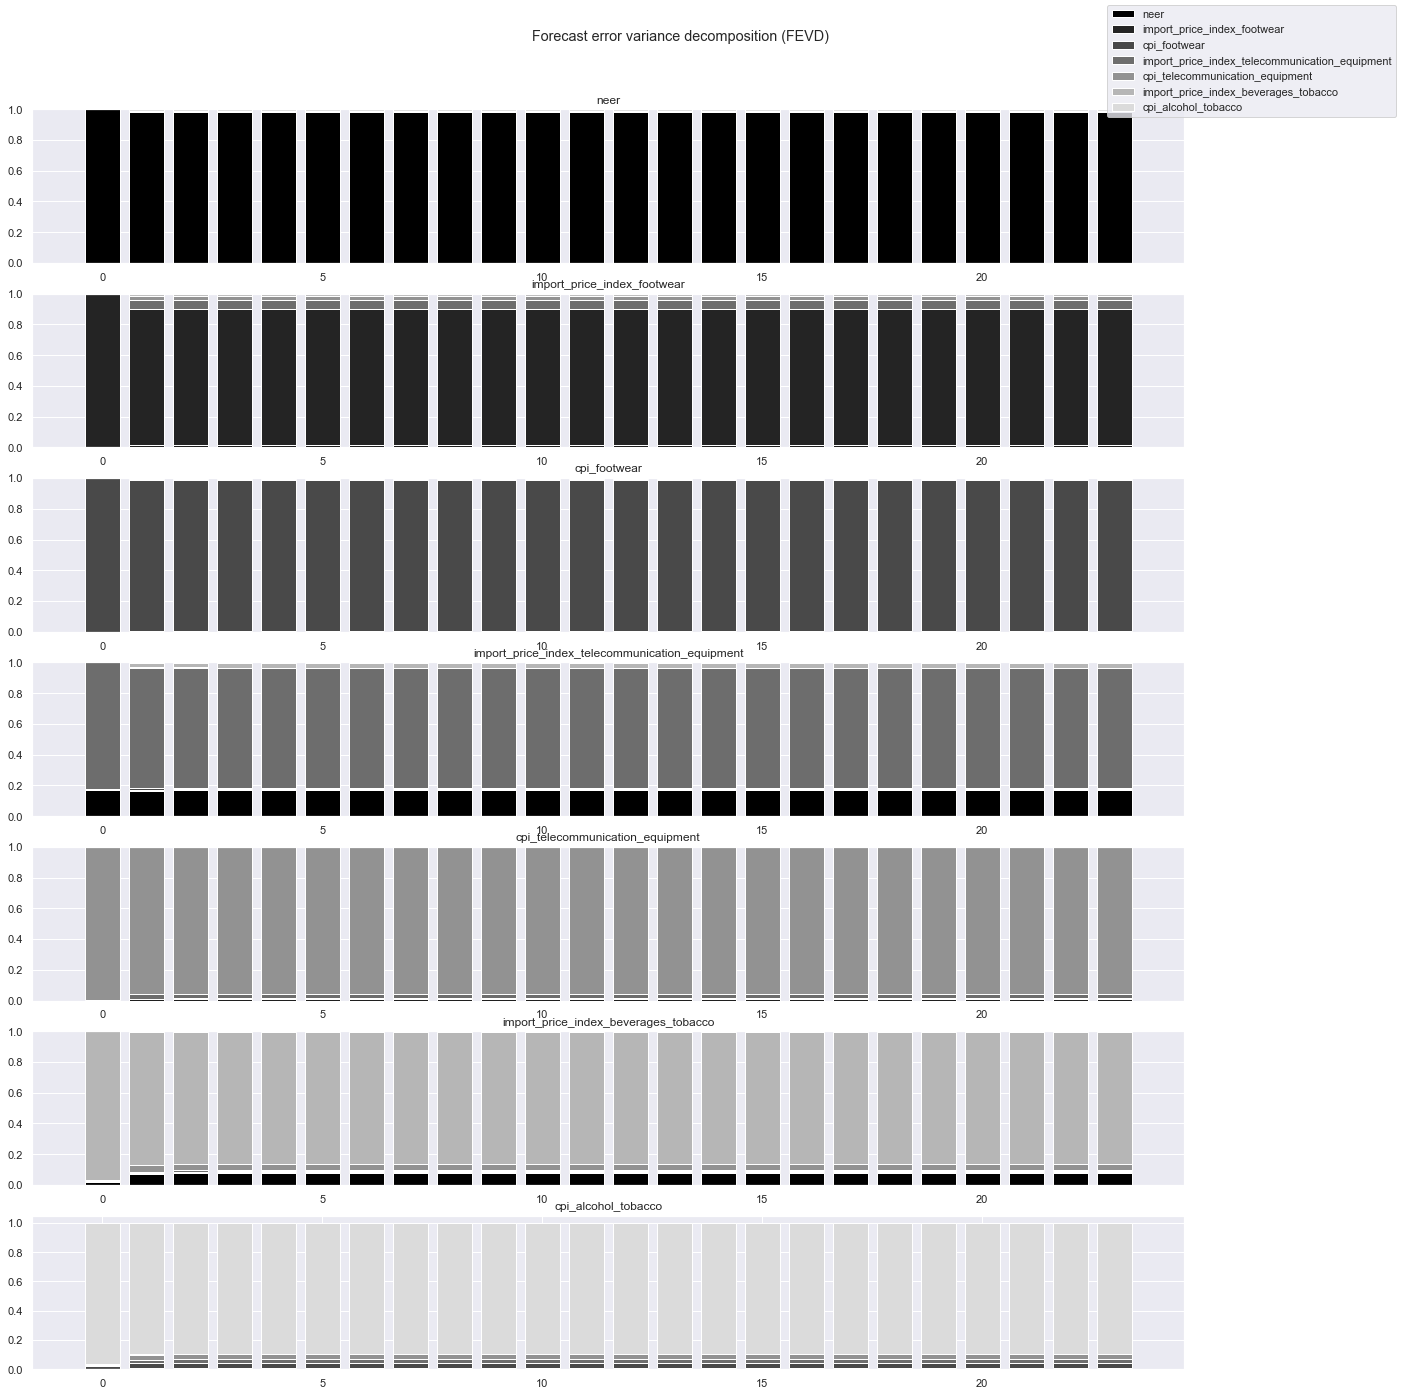

In [135]:
fevd = results.fevd(24).plot(figsize=(20,20))
plt.savefig('hetero_fevd.png')

In [136]:
results.fevd(24).summary()

FEVD for neer
          neer  import_price_index_footwear  cpi_footwear  import_price_index_telecommunication_equipment  cpi_telecommunication_equipment  import_price_index_beverages_tobacco  cpi_alcohol_tobacco
0     1.000000                     0.000000      0.000000                                        0.000000                         0.000000                              0.000000             0.000000
1     0.985145                     0.000134      0.000365                                        0.000425                         0.001136                              0.002102             0.010693
2     0.981492                     0.000133      0.000384                                        0.001349                         0.001610                              0.002295             0.012737
3     0.981019                     0.000133      0.000431                                        0.001407                         0.001695                              0.002331             0.012

In [137]:
cols = ['neer', 
       'import_price_index_footwear', 
        'cpi_footwear', 
        'import_price_index_telecommunication_equipment', 
        'cpi_telecommunication_equipment',
       'import_price_index_beverages_tobacco', 
        'cpi_alcohol_tobacco']

coint_results = coint_johansen(np.log(data[cols]+1), det_order=0, k_ar_diff=1)
print_coint_results(coint_results)


--------------------------------------------------
--> Trace Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 144.3791 120.3673 125.6185 135.9825
r = 1 	 92.0628 91.109 95.7542 104.9637
r = 2 	 59.2764 65.8202 69.8189 77.8202
r = 3 	 35.6538 44.4929 47.8545 54.6815
r = 4 	 21.8884 27.0669 29.7961 35.4628
r = 5 	 9.9918 13.4294 15.4943 19.9349
r = 6 	 0.7622 2.7055 3.8415 6.6349
--------------------------------------------------


In [138]:
vecm_model = VECM(endog = np.log(data[cols]+1), k_ar_diff = 1, coint_rank = 1, deterministic = 'co')
vecm_fit = vecm_model.fit()
vecm_fit.summary()
print(vecm_fit.test_whiteness())

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 451.369, critical value: 483.571>, p-value: 0.273>


C:\Users\Reverse\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [139]:
vecm_irf = vecm_fit.irf(24)

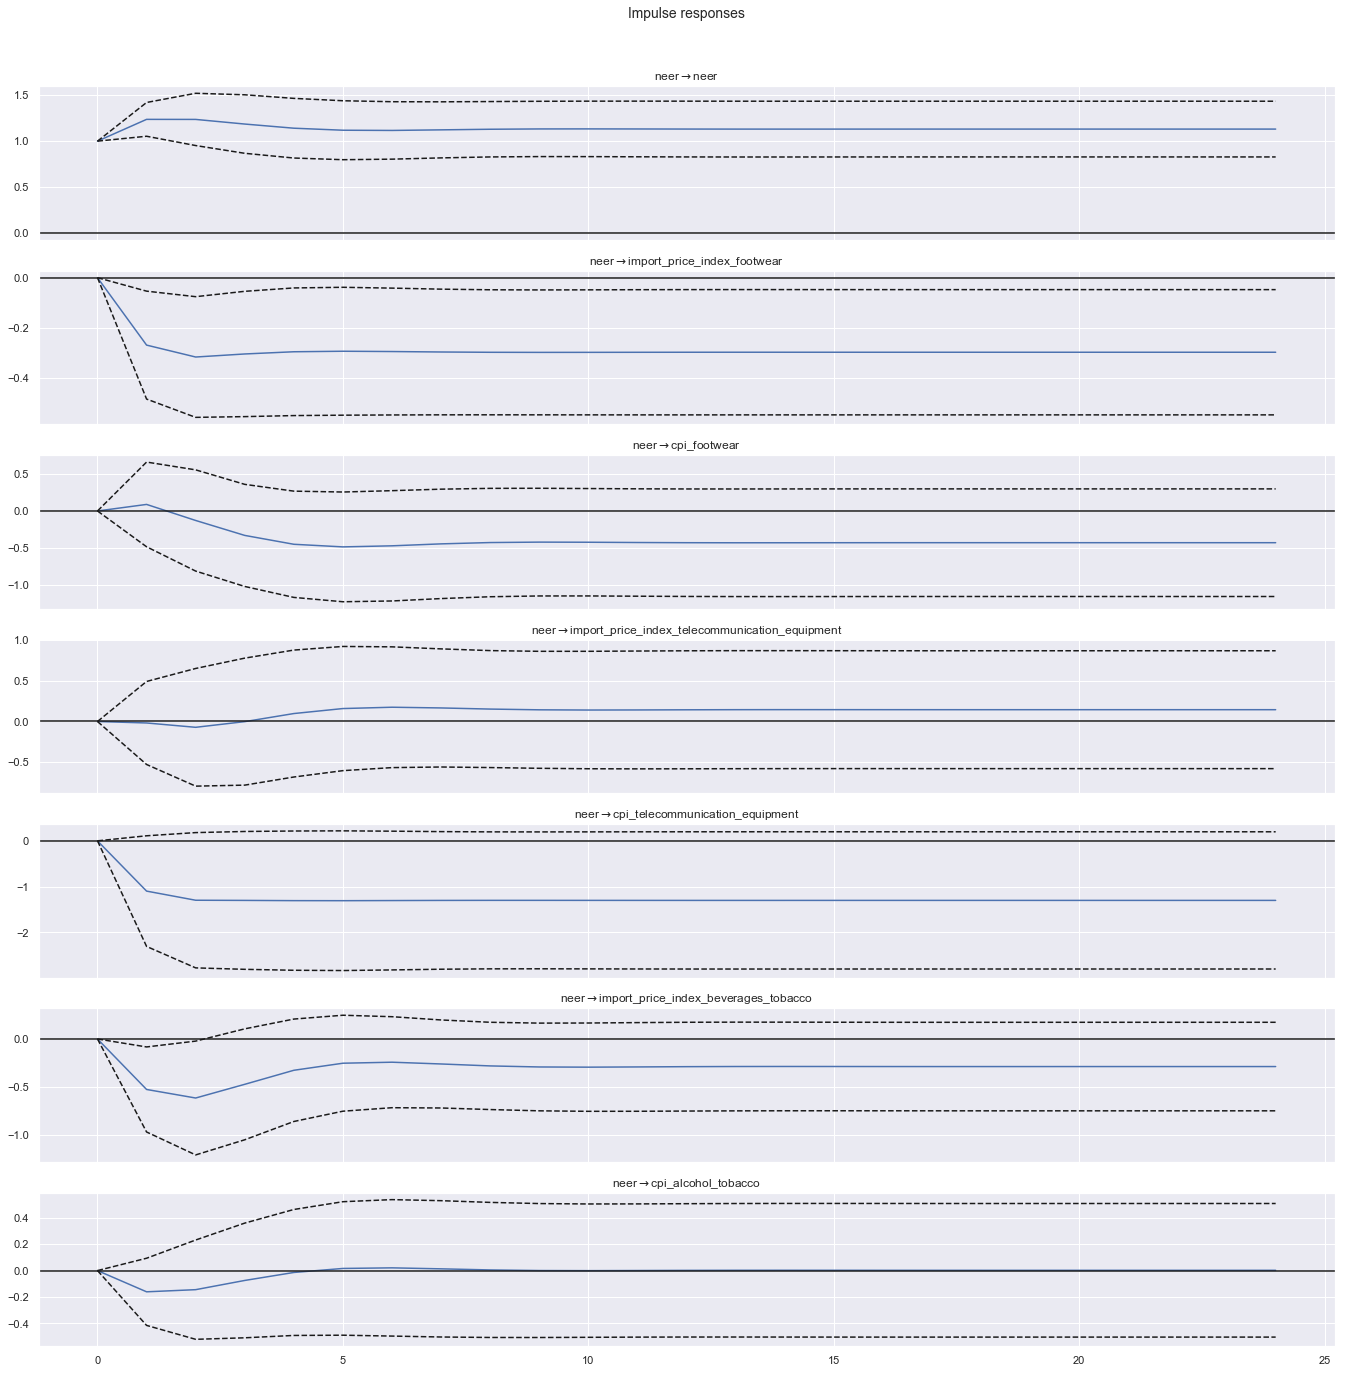

In [140]:
irf_plot = vecm_irf.plot(orth=False, figsize=(20,20), impulse='neer')
plt.savefig('vecm_hetero_ira.png')

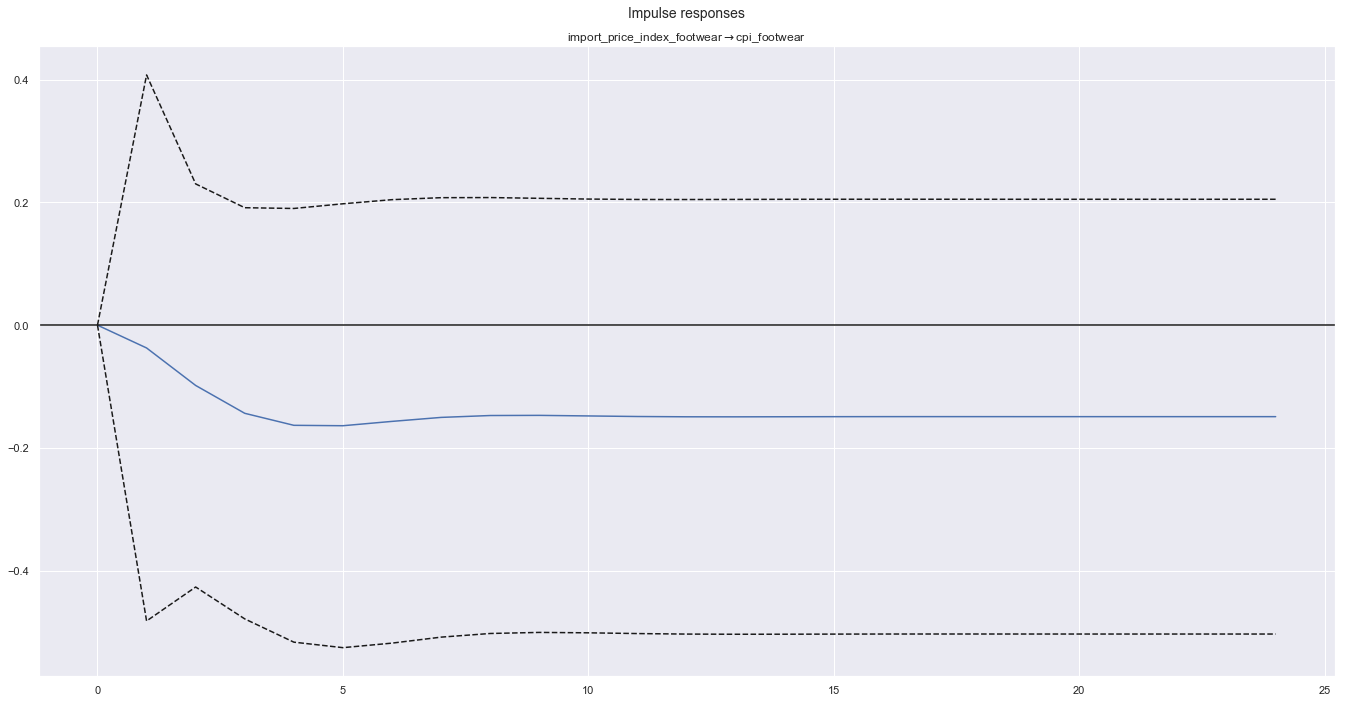

In [143]:
irf_plot = vecm_irf.plot(orth=False, figsize=(20,10), impulse='import_price_index_footwear', response='cpi_footwear')
plt.savefig('vecm_ipi_cpi_footwear.png')

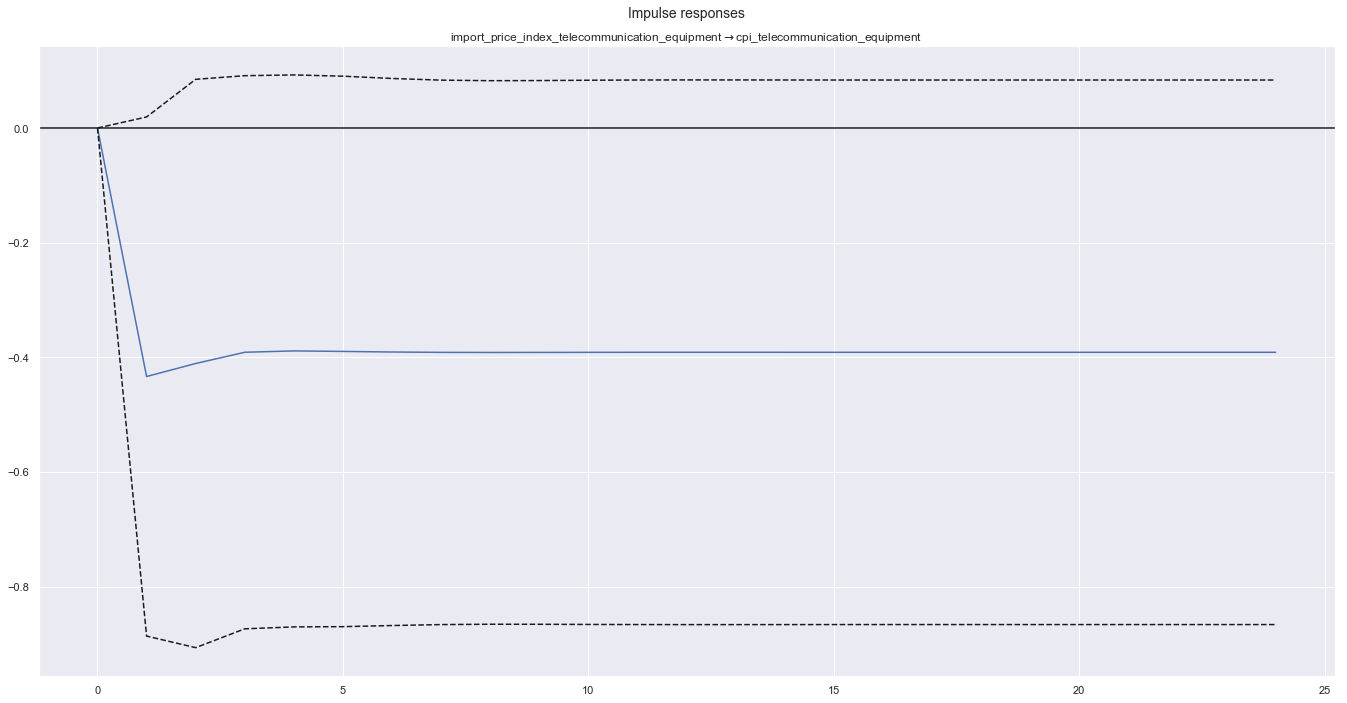

In [144]:
irf_plot = vecm_irf.plot(orth=False, figsize=(20,10), impulse='import_price_index_telecommunication_equipment', response='cpi_telecommunication_equipment')
plt.savefig('vecm_ipi_cpi_telecomm.png')

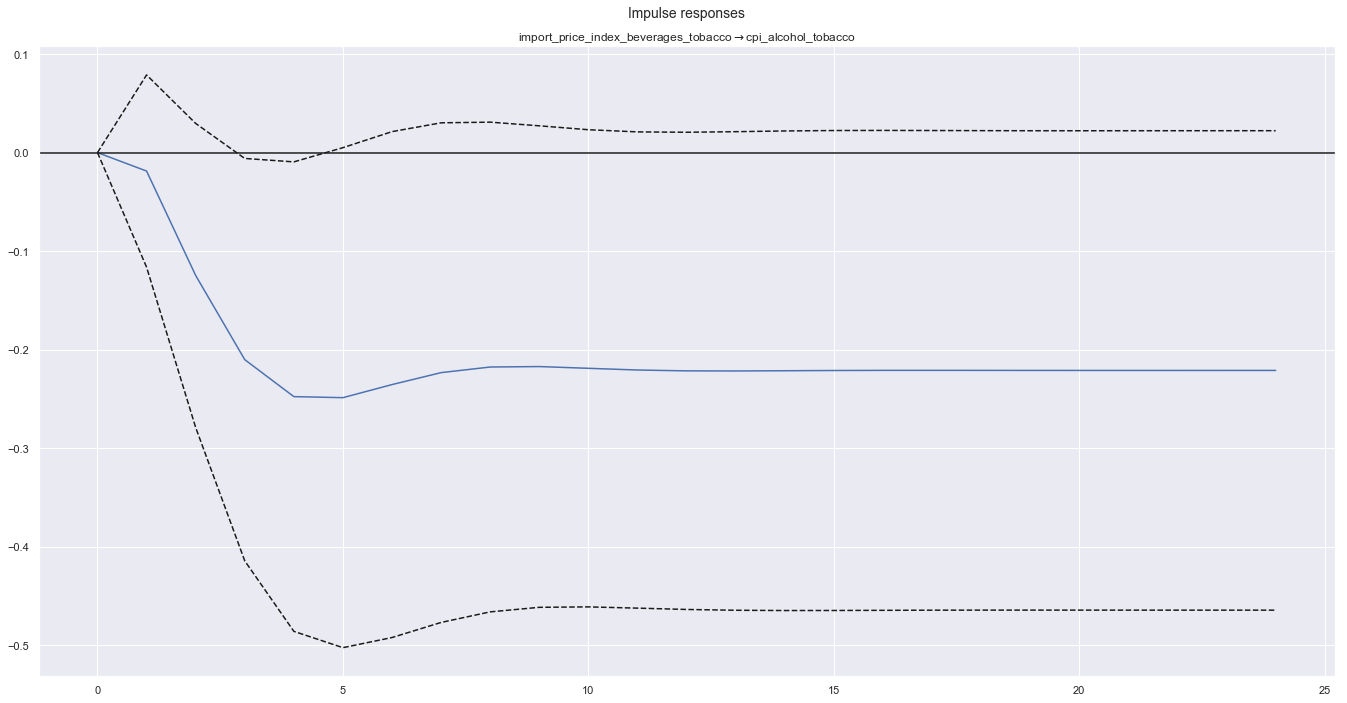

In [145]:
irf_plot = vecm_irf.plot(orth=False, figsize=(20,10), impulse='import_price_index_beverages_tobacco', response='cpi_alcohol_tobacco')
plt.savefig('vecm_ipi_cpi_beverages_tobacco.png')